
원본데이터 - 로그데이터

원본데이터  - 유저 특성 데이터 - 클러스터링 이후에 결과 집단의 특성을 토대로 비즈니스 전략 수립 가능


            - 비즈니스 전략 데이터


1. 유저 분석을 위한 유저 기준으로 정리된 데이터 - 클러스터링
=> 유저특성지표

row의 단위 : 유저 1명
col의 단위 : 해당 유저에 대한 통계량

EDA해서 나온 요소들을 통합하기

	1) R, F, M
	2) 구매횟수대비 쿠폰사용율
  	3) 평균구매주기






2. 마케팅, 비즈니스 전략을 위한 데이터
=> 경향성 지표


	1) ROAS 지표 = 광고비 대비 매출액(수익)
	   단위기간 중 총 광고비용이 높은 특정 기간
      	   특정 기간 중에 거래량이 많은 집단 특정
	   전략 : 1)결과값을 보고 저희 주관이 들어간 요소

	2) 오프라인 비용으로부터 초래되는 비효율 줄이기
                주장 : 오프라인 마케팅이 효과가 미비하다
                         효과가 상대적으로 좋은 온라인이 오프라인에 맞춰서 조정되는 것이 비효율이다
	   
                오프라인비용 : 일주일단위로 조정 - 비탄력적 요소
                온라인비용 : 하루 단위로 조정 - 탄력적 요소

	    온라인, 오프라인 7일 이동평균 상관관계 = 0.74

	   총 마케팅비용과 총매출 간의 관계        = 0.14
                온라인비용이동평균과 총매출간의 관계 = 0.2












목표1. 클러스터링 해보기
그것을 위한 숙제
1. RFM 간소화하기(클러스터링과의 비교군) => 7개 그룹정도?
    5 * 5 * 2 = 
    - 참고 및 평가요소(+ 실루엣 점수)
    1) 클러스터링을 통해 나온 그룹을 어떤 그룹으로 정의할지의 참고사항
    2) 우리만의 클러스터링이 가지고 있는 요소(ex. 우리가 한 클러스터링의 vip는 ㅇㅇㅇ가 RFM에 비해 높다, 대신 ㅇㅇㅇ는 관대하다)
    분류된 고객층 중에서 특정층을 공략하기 => 최종목표
2. Monetary별 가중치 해결하기
3. EDA를 통한 유저 특성 컬럼 추가하기


목표2. ROAS에 요소 추가



## 2023-04-09
### 1. rfm의 컬럼 기준으로 EDA
        - 컬럼들의 분포를 기준으로 bins값을 다시 정한다든지 등

### 2. rfm의 카테고리 컬럼의 차원 축소
        - 최다구매카테고리 : 당일에 결정
        - 지역 : 5개
        - 최다구매월 : 분기로 축소
        - 성별 : 2개

### 3. 클러스터링
        - 적절한 클러스터링 기법과 클러스터의 수, 각 센터로이드의 특징

## 클러스터링을 강화하는 방향
### 1. 유저 중심 컬럼

In [172]:
import numpy as np
import pandas as pd

import datetime as dt
import time
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

import re

import warnings
warnings.filterwarnings('ignore')

In [173]:
df1 = pd.read_csv('C:/Users/ttjee/OneDrive/바탕 화면/데이터분석_국비/최종프로젝트/데이콘_이커머스 고객 세분화 분석/open/Onlinesales_info.csv')
df2 = pd.read_csv('C:/Users/ttjee/OneDrive/바탕 화면/데이터분석_국비/최종프로젝트/데이콘_이커머스 고객 세분화 분석/open/Customer_info.csv')
df3 = pd.read_csv('C:/Users/ttjee/OneDrive/바탕 화면/데이터분석_국비/최종프로젝트/데이콘_이커머스 고객 세분화 분석/open/Discount_info.csv')
df4 = pd.read_csv('C:/Users/ttjee/OneDrive/바탕 화면/데이터분석_국비/최종프로젝트/데이콘_이커머스 고객 세분화 분석/open/Marketing_info.csv')
df5 = pd.read_csv('C:/Users/ttjee/OneDrive/바탕 화면/데이터분석_국비/최종프로젝트/데이콘_이커머스 고객 세분화 분석/open/Tax_info.csv')

In [174]:
df = pd.merge(df1, df2, how='left', on='고객ID')
df = pd.merge(df, df5, how='left', on='제품카테고리')

df['거래날짜'] = pd.to_datetime(df['거래날짜'])
df['월'] = df['거래날짜'].dt.month

In [175]:
def month_shift(x):
    dict = {1:'Jan',
            2:'Feb',
            3:'Mar',
            4:'Apr',
            5:'May',
            6:'Jun',
            7:'Jul',
            8:'Aug',
            9:'Sep',
            10:'Oct',
            11:'Nov',
            12:'Dec'}
    
    return dict[x]

In [176]:
df['월'] = df['월'].apply(month_shift)

In [177]:
df = pd.merge(df, df3, how='left', on=['월', '제품카테고리'])

In [178]:
df4['날짜'] = pd.to_datetime(df4['날짜'])
df = pd.merge(df, df4, how='left', left_on='거래날짜', right_on='날짜')

df = df.drop('날짜', axis=1)

In [179]:
df.head()

고객ID              거래ID       거래날짜          제품ID    제품카테고리  수량    평균금액  \
0  USER_1358  Transaction_0000 2019-01-01  Product_0981  Nest-USA   1  153.71   
1  USER_1358  Transaction_0001 2019-01-01  Product_0981  Nest-USA   1  153.71   
2  USER_1358  Transaction_0002 2019-01-01  Product_0904    Office   1    2.05   
3  USER_1358  Transaction_0003 2019-01-01  Product_0203   Apparel   5   17.53   
4  USER_1358  Transaction_0003 2019-01-01  Product_0848      Bags   1   16.50   

   배송료      쿠폰상태 성별     고객지역  가입기간   GST    월    쿠폰코드   할인율  오프라인비용   온라인비용  
0  6.5      Used  남  Chicago    12  0.10  Jan  ELEC10  10.0    4500  2424.5  
1  6.5      Used  남  Chicago    12  0.10  Jan  ELEC10  10.0    4500  2424.5  
2  6.5      Used  남  Chicago    12  0.10  Jan   OFF10  10.0    4500  2424.5  
3  6.5  Not Used  남  Chicago    12  0.18  Jan  SALE10  10.0    4500  2424.5  
4  6.5      Used  남  Chicago    12  0.18  Jan   AIO10  10.0    4500  2424.5

In [180]:
df.to_csv('merge.csv')

In [181]:
df.head()

고객ID              거래ID       거래날짜          제품ID    제품카테고리  수량    평균금액  \
0  USER_1358  Transaction_0000 2019-01-01  Product_0981  Nest-USA   1  153.71   
1  USER_1358  Transaction_0001 2019-01-01  Product_0981  Nest-USA   1  153.71   
2  USER_1358  Transaction_0002 2019-01-01  Product_0904    Office   1    2.05   
3  USER_1358  Transaction_0003 2019-01-01  Product_0203   Apparel   5   17.53   
4  USER_1358  Transaction_0003 2019-01-01  Product_0848      Bags   1   16.50   

   배송료      쿠폰상태 성별     고객지역  가입기간   GST    월    쿠폰코드   할인율  오프라인비용   온라인비용  
0  6.5      Used  남  Chicago    12  0.10  Jan  ELEC10  10.0    4500  2424.5  
1  6.5      Used  남  Chicago    12  0.10  Jan  ELEC10  10.0    4500  2424.5  
2  6.5      Used  남  Chicago    12  0.10  Jan   OFF10  10.0    4500  2424.5  
3  6.5  Not Used  남  Chicago    12  0.18  Jan  SALE10  10.0    4500  2424.5  
4  6.5      Used  남  Chicago    12  0.18  Jan   AIO10  10.0    4500  2424.5

In [182]:
user_region = pd.DataFrame(df.groupby('고객ID')['고객지역'].apply(lambda x: x.value_counts().idxmax()))

In [183]:
mode_category = pd.DataFrame(df.groupby('고객ID')['제품카테고리'].apply(lambda x: x.value_counts(ascending=False).index.values))
mode_category['first'] = mode_category['제품카테고리'].apply(lambda x: x[0])
mode_category['Second'] = mode_category['제품카테고리'].apply(lambda x: x[1] if len(x) >= 2 else 'None')
mode_category['Third'] = mode_category['제품카테고리'].apply(lambda x: x[2] if len(x) >= 3 else 'None')



mode_category

제품카테고리     first  \
고객ID                                                                     
USER_0000                                  [Apparel, Office]   Apparel   
USER_0001  [Nest-USA, Apparel, Office, Bags, Drinkware, N...  Nest-USA   
USER_0002  [Office, Lifestyle, Apparel, Drinkware, Bags, ...    Office   
USER_0003         [Apparel, Nest-USA, Nest-Canada, Headgear]   Apparel   
USER_0004  [Apparel, Office, Nest-USA, Lifestyle, Drinkwa...   Apparel   
...                                                      ...       ...   
USER_1463  [Apparel, Notebooks & Journals, More Bags, Dri...   Apparel   
USER_1464  [Apparel, Nest-USA, Office, Notebooks & Journa...   Apparel   
USER_1465                                  [Apparel, Office]   Apparel   
USER_1466                                         [Nest-USA]  Nest-USA   
USER_1467  [Apparel, Nest-USA, Office, Gift Cards, Lifest...   Apparel   

                         Second        Third  
고객ID                                          
USER_0000                Office         None  
USER_0001               Apparel       Office  
USER_0002             Lifestyle      Apparel  
USER_0003              Nest-USA  Nest-Canada  
USER_0004                Office     Nest-USA  
...                         ...          ...  
USER_1463  Notebooks & Journals    More Bags  
USER_1464              Nest-USA       Office  
USER_1465                Office         None  
USER_1466                  None         None  
USER_1467              Nest-USA       Office  

[1468 rows x 4 columns]

In [184]:
df['쿠폰코드'] = df['쿠폰코드'].fillna(np.nan)
df['할인율'] = df['할인율'].fillna(0)

In [185]:
def true_discount(x):
    if x == 'Used':
        return 1
    else:
        return 0

In [186]:
df['true_discount'] = df['쿠폰상태'].apply(true_discount)

In [187]:
df.head()

고객ID              거래ID       거래날짜          제품ID    제품카테고리  수량    평균금액  \
0  USER_1358  Transaction_0000 2019-01-01  Product_0981  Nest-USA   1  153.71   
1  USER_1358  Transaction_0001 2019-01-01  Product_0981  Nest-USA   1  153.71   
2  USER_1358  Transaction_0002 2019-01-01  Product_0904    Office   1    2.05   
3  USER_1358  Transaction_0003 2019-01-01  Product_0203   Apparel   5   17.53   
4  USER_1358  Transaction_0003 2019-01-01  Product_0848      Bags   1   16.50   

   배송료      쿠폰상태 성별     고객지역  가입기간   GST    월    쿠폰코드   할인율  오프라인비용   온라인비용  \
0  6.5      Used  남  Chicago    12  0.10  Jan  ELEC10  10.0    4500  2424.5   
1  6.5      Used  남  Chicago    12  0.10  Jan  ELEC10  10.0    4500  2424.5   
2  6.5      Used  남  Chicago    12  0.10  Jan   OFF10  10.0    4500  2424.5   
3  6.5  Not Used  남  Chicago    12  0.18  Jan  SALE10  10.0    4500  2424.5   
4  6.5      Used  남  Chicago    12  0.18  Jan   AIO10  10.0    4500  2424.5   

   true_discount  
0              1  
1              1  
2              1  
3              0  
4              1

In [188]:

# 카테고리별 주문량 계산
category_order_volume = pd.DataFrame(df.groupby('제품카테고리').size().reset_index(name='주문건수'))

# 카테고리별 총 주문 수량 계산
category_order_quantity = pd.DataFrame(df.groupby('제품카테고리')['수량'].sum().reset_index(name='총주문수량'))


category_order_total = pd.merge(category_order_volume, category_order_quantity,  how='left', on='제품카테고리')
category_order_total['평균주문수량'] = category_order_total['총주문수량'] / category_order_total['주문건수']
category_order_total['주문건수비율(%)'] = (category_order_total['주문건수'] / category_order_total['주문건수'].sum()).round(4) * 100

print('                            제품카테고별 주문 정보')
category_order_total.sort_values('주문건수', ascending=False).reset_index(drop=True)

                            제품카테고별 주문 정보


제품카테고리   주문건수  총주문수량     평균주문수량  주문건수비율(%)
0                Apparel  18126  32438   1.789584      34.25
1               Nest-USA  14013  21430   1.529294      26.48
2                 Office   6513  88383  13.570244      12.31
3              Drinkware   3483  30501   8.757106       6.58
4              Lifestyle   3092  24881   8.046895       5.84
5                   Nest   2198   2837   1.290719       4.15
6                   Bags   1882  15273   8.115303       3.56
7               Headgear    771   3533   4.582361       1.46
8   Notebooks & Journals    749   9556  12.758344       1.42
9                   Waze    554   1144   2.064982       1.05
10           Nest-Canada    317    469   1.479495       0.60
11               Bottles    268   2090   7.798507       0.51
12           Accessories    234   1097   4.688034       0.44
13                   Fun    160    834   5.212500       0.30
14            Gift Cards    159    206   1.295597       0.30
15            Housewares    122   2484  20.360656       0.23
16                Google    105    575   5.476190       0.20
17             Backpacks     89    113   1.269663       0.17
18             More Bags     46    144   3.130435       0.09
19               Android     43     45   1.046512       0.08

Text(0.5, 1.0, '카테고리별 평균주문 분포')

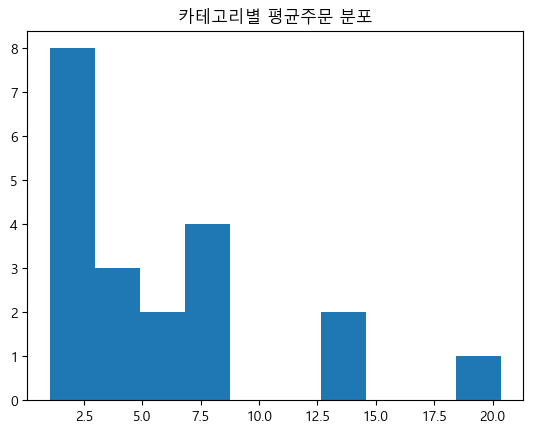

In [189]:
plt.hist(category_order_total['평균주문수량'])
plt.title('카테고리별 평균주문 분포')

In [190]:
coupon_use_rate = df.groupby(['제품카테고리', '쿠폰상태']).size().unstack(fill_value=0)
coupon_use_rate['Clicked_rate'] = coupon_use_rate['Clicked'] / coupon_use_rate.sum(axis=1)
coupon_use_rate['Not Used_rate'] = coupon_use_rate['Not Used'] / coupon_use_rate.sum(axis=1)
coupon_use_rate['Used_rate'] = coupon_use_rate['Used'] / coupon_use_rate.sum(axis=1)

print('                  제품카테고별 쿠폰상태 비율(%)')
coupon_use_rate= coupon_use_rate[['Used_rate', 'Clicked_rate', 'Not Used_rate']].round(4) * 100


coupon_use_rate['marketing_effect'] = coupon_use_rate['Used_rate']  / (coupon_use_rate['Used_rate'] + coupon_use_rate['Clicked_rate'])


coupon_use_rate['marketing_effect'] = coupon_use_rate['marketing_effect'].round(4) * 100

coupon_use_rate.sort_values('marketing_effect', ascending=False)

                  제품카테고별 쿠폰상태 비율(%)


쿠폰상태                  Used_rate  Clicked_rate  Not Used_rate  marketing_effect
제품카테고리                                                                        
Lifestyle                 35.60         49.45          14.94             41.86
More Bags                 38.62         54.35           6.45             41.54
Gift Cards                35.08         50.94          13.79             40.78
Office                    34.54         50.59          14.86             40.57
Apparel                   33.96         50.88          15.15             40.03
Drinkware                 33.33         50.30          16.36             39.85
Notebooks & Journals      34.28         51.94          13.74             39.76
Nest-USA                  33.62         50.96          15.41             39.75
Waze                      33.17         50.72          16.05             39.54
Bags                      33.20         51.65          15.14             39.13
Nest                      32.75         51.27          15.97             38.98
Headgear                  33.17         52.01          14.78             38.94
Fun                       32.36         51.88          15.57             38.41
Accessories               32.81         53.42          13.64             38.05
Bottles                   30.52         51.49          17.88             37.21
Backpacks                 30.10         52.81          16.75             36.30
Google                    27.43         48.57          23.70             36.09
Nest-Canada               29.90         55.21          14.80             35.13
Housewares                29.34         55.74          14.69             34.49
Android                   22.85         53.49          22.97             29.93

In [191]:
gender_rate = df.groupby(['제품카테고리', '성별']).size().unstack(fill_value=0)
gender_rate = pd.merge(gender_rate, category_order_total[['제품카테고리', '주문건수']], how='left', on='제품카테고리')
gender_rate = gender_rate.sort_values('주문건수', ascending=False)
gender_rate['Male'] = gender_rate['남'] / gender_rate['주문건수']
gender_rate['Female'] = gender_rate['여'] / gender_rate['주문건수']



print('       제품카테고별 성별 비율(%)')
gender_rate = gender_rate[['제품카테고리', 'Male', 'Female']].set_index('제품카테고리').round(4) * 100
gender_rate.sort_values('Female', ascending=False)

       제품카테고별 성별 비율(%)


Male  Female
제품카테고리                             
Gift Cards            25.16   74.84
More Bags             30.43   69.57
Headgear              34.63   65.37
Bottles               35.07   64.93
Office                35.85   64.15
Bags                  37.19   62.81
Apparel               37.36   62.64
Drinkware             37.38   62.62
Nest-Canada           37.85   62.15
Fun                   38.12   61.88
Lifestyle             38.29   61.71
Nest-USA              38.33   61.67
Accessories           38.89   61.11
Android               39.53   60.47
Nest                  39.67   60.33
Google                40.00   60.00
Housewares            40.16   59.84
Waze                  40.97   59.03
Notebooks & Journals  42.32   57.68
Backpacks             48.31   51.69

In [192]:
df.columns

Index(['고객ID', '거래ID', '거래날짜', '제품ID', '제품카테고리', '수량', '평균금액', '배송료', '쿠폰상태',
       '성별', '고객지역', '가입기간', 'GST', '월', '쿠폰코드', '할인율', '오프라인비용', '온라인비용',
       'true_discount'],
      dtype='object')

고객지역 - 서인
월 - 경화
가입기간 - 정식

거래ID	     - F(count)
거래날짜     - 기준(날짜별 금액), 고유거래일(nunique)
제품ID	    - 
제품카테고리 - 최다구매카테고리
수량        - 평균수량
평균금액    - 수량, 할인율, GST 배송료 등과 결합하여 총금액
배송료	    - (총금액 계산을 위한 평균 배송료)
쿠폰상태    - 구매횟수대비쿠폰사용율, 총할인금액, clicked 비율
성별	    - 성별은 성별
고객지역	- 지역은 지역
가입기간	- 기간은 기간
GST	       - 총납세액
월	       - 최다구매월, 해당월의 거래수
할인율	    - 총금액 계산시에 사용, 평균 할인율(not used = 0)

4개씩 분담해서 만들어오기

### 1. raw 데이터 join만 해놓은   df                                
                    
- ~~총금액(row단위) ~~                        
- ~~(총금액 계산을 위한 평균 배송료)  ~~      
- ~~납세액(row)~~

### 2. user별로 groupby한 rfm
- ~~F(count)~~
- 고유거래일(nunique)
- ~~최다구매카테고리~~    
- 평균수량 
- ~~총금액(유저단위)~~
- ~~구매횟수대비쿠폰사용율~~
- 총할인금액
- clicked 비율
- 성별, 지역, 기간
- ~~총납세액(유저단위)~~
- 최다구매월
- 해당월의 거래수
- 평균 할인율(not used = 0)



1) 준범                                                               
- 총금액(유저단위)                     
- 총금액(row단위)                    
- 납세액(row)                           
- (총금액 계산을 위한 평균 배송료)        
- 총납세액(유저단위)

2) 정식

- 고유거래일(nunique)
- 평균수량 

3) 서인
- 총할인금액
- clicked 비율
- 성별, 지역, 기간

4) 경화
- 최다구매월
- 해당월의 거래수
- 평균 할인율(not used = 0)

In [193]:
transfer = pd.DataFrame(df.groupby(['고객ID', '거래ID'])['배송료'].mean() / df.groupby(['고객ID', '거래ID'])['제품카테고리'].count())
transfer = transfer.reset_index()
transfer = transfer.rename(columns={0:'평균배송료'})


In [194]:
df = pd.merge(df, transfer, how='left', on=['고객ID', '거래ID'])

In [195]:
df['납세액'] = df['수량'] * df['평균금액'] * df['GST']

In [196]:
df['총금액'] = (df['평균금액'] * ((100 - (df['true_discount'] * df['할인율'])) / 100) * df['수량']) + df['평균배송료'] + df['납세액']  # 고객이 최종적으로 부담하는 금액


In [197]:
today_date = dt.datetime(2019,12,31)
rfm = pd.DataFrame(df.groupby('고객ID').agg({'거래ID':'nunique',
                          '총금액':'sum',
                          '거래날짜': lambda x: (today_date - x.max()).days,
                          '납세액':'sum'}))

rfm = rfm.rename(columns={'거래ID':'Frequency',
                          '총금액':'Monetary',
                          '거래날짜':'Recency',
                          '납세액':'총납세액'})
rfm = rfm[['Recency', 'Frequency', 'Monetary', '총납세액']]

In [198]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1468 entries, USER_0000 to USER_1467
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    1468 non-null   int64  
 1   Frequency  1468 non-null   int64  
 2   Monetary   1468 non-null   float64
 3   총납세액       1468 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 57.3+ KB


In [199]:
rfm.head()

Recency  Frequency    Monetary       총납세액
고객ID                                                
USER_0000      107          1    101.3912     4.6982
USER_0001       59         31  15407.7190  2067.9070
USER_0002       73          8   1596.0858   203.6008
USER_0003       17         11   1438.5072   148.2642
USER_0004      107         13   1541.9718   151.7598

In [200]:
temp = pd.DataFrame(df.groupby(['고객ID', '거래ID'])['수량'].sum()).reset_index()

mean_purchase_quantity = temp.groupby('고객ID')['수량'].mean().reset_index()
# 'rfm' 테이블에 고객ID를 기준으로 merge
rfm = pd.merge(rfm, mean_purchase_quantity, on='고객ID', how='left')

# 컬럼명 변경
rfm.rename(columns={'수량': '평균구매수량'}, inplace=True)
rfm.head()

고객ID  Recency  Frequency    Monetary       총납세액     평균구매수량
0  USER_0000      107          1    101.3912     4.6982   3.000000
1  USER_0001       59         31  15407.7190  2067.9070  11.032258
2  USER_0002       73          8   1596.0858   203.6008  26.125000
3  USER_0003       17         11   1438.5072   148.2642   1.909091
4  USER_0004      107         13   1541.9718   151.7598   4.307692

In [201]:
kh_mon = df.groupby(['고객ID', '월'])['거래ID'].nunique().reset_index(name='구매횟수')
kh_mon = kh_mon.loc[kh_mon.groupby('고객ID')['구매횟수'].idxmax()]
kh_mon = kh_mon.rename(columns={'월':'최다구매월'})


df['real_discount'] = df['할인율'] * df['true_discount']
dis_kh = df.groupby('고객ID')['real_discount'].mean().reset_index()
dis_kh['real_discount'] = dis_kh['real_discount'].round(2)
dis_kh = dis_kh.rename(columns={'real_discount':'평균할인율'})

rfm= pd.merge(rfm,kh_mon, how='left',on='고객ID')
rfm= pd.merge(rfm,dis_kh, how='left',on='고객ID')
rfm

고객ID  Recency  Frequency    Monetary       총납세액     평균구매수량 최다구매월  \
0     USER_0000      107          1    101.3912     4.6982   3.000000   Sep   
1     USER_0001       59         31  15407.7190  2067.9070  11.032258   Nov   
2     USER_0002       73          8   1596.0858   203.6008  26.125000   Jun   
3     USER_0003       17         11   1438.5072   148.2642   1.909091   Dec   
4     USER_0004      107         13   1541.9718   151.7598   4.307692   Sep   
...         ...      ...        ...         ...        ...        ...   ...   
1463  USER_1463      270          3    678.7202    51.2202  15.333333   Apr   
1464  USER_1464       87         19   2631.9586   277.1706   7.421053   Aug   
1465  USER_1465      194          2    128.5234    18.0264   5.000000   Apr   
1466  USER_1466       69          1    333.8000    29.8000   2.000000   Oct   
1467  USER_1467       82         53   7000.0783   583.1923   2.924528   Oct   

      구매횟수  평균할인율  
0        1  30.00  
1       18   8.00  
2        4  11.74  
3       11  10.59  
4       13   9.17  
...    ...    ...  
1463     3   4.29  
1464    10   9.25  
1465     1   3.75  
1466     1   0.00  
1467    31   3.73  

[1468 rows x 9 columns]

In [202]:
unique_transaction_date = df.groupby('고객ID')['거래날짜'].nunique()

# 'rfm' 테이블에 고객ID를 기준으로 merge
rfm = pd.merge(rfm, unique_transaction_date, on='고객ID', how='left')

# 컬럼명 변경
rfm.rename(columns={'거래날짜': '고유거래일수'}, inplace=True)
rfm.head()

고객ID  Recency  Frequency    Monetary       총납세액     평균구매수량 최다구매월  \
0  USER_0000      107          1    101.3912     4.6982   3.000000   Sep   
1  USER_0001       59         31  15407.7190  2067.9070  11.032258   Nov   
2  USER_0002       73          8   1596.0858   203.6008  26.125000   Jun   
3  USER_0003       17         11   1438.5072   148.2642   1.909091   Dec   
4  USER_0004      107         13   1541.9718   151.7598   4.307692   Sep   

   구매횟수  평균할인율  고유거래일수  
0     1  30.00       1  
1    18   8.00       3  
2     4  11.74       2  
3    11  10.59       1  
4    13   9.17       1

In [203]:
last_date = dt.datetime(2019, 12, 31)

date = df.sort_values(['고객ID', '거래날짜'])[['고객ID', '거래날짜']].drop_duplicates()
date['구매주기'] = date.groupby('고객ID')['거래날짜'].diff().fillna(last_date-date['거래날짜'])

avg_buying = pd.DataFrame(date.groupby('고객ID')['구매주기'].mean()).reset_index()


rfm = pd.merge(rfm, avg_buying, how='left', on='고객ID').rename(columns={'구매주기':'평균구매주기'})

rfm['평균구매주기'] = rfm['평균구매주기'].dt.days

In [204]:
# 클러스터링에 사용할 유저 특성 테이블
rfm = pd.merge(rfm, mode_category, how='left', on='고객ID')

In [205]:
rfm = rfm.rename(columns={'제품카테고리':'최다구매카테고리',
                          '구매횟수':'당월구매횟수',
                          'first':'First_category',
                          'Second':'Second_category',
                          'Third':'Third_category'})
rfm = rfm.drop('최다구매카테고리', axis=1)
rfm

고객ID  Recency  Frequency    Monetary       총납세액     평균구매수량 최다구매월  \
0     USER_0000      107          1    101.3912     4.6982   3.000000   Sep   
1     USER_0001       59         31  15407.7190  2067.9070  11.032258   Nov   
2     USER_0002       73          8   1596.0858   203.6008  26.125000   Jun   
3     USER_0003       17         11   1438.5072   148.2642   1.909091   Dec   
4     USER_0004      107         13   1541.9718   151.7598   4.307692   Sep   
...         ...      ...        ...         ...        ...        ...   ...   
1463  USER_1463      270          3    678.7202    51.2202  15.333333   Apr   
1464  USER_1464       87         19   2631.9586   277.1706   7.421053   Aug   
1465  USER_1465      194          2    128.5234    18.0264   5.000000   Apr   
1466  USER_1466       69          1    333.8000    29.8000   2.000000   Oct   
1467  USER_1467       82         53   7000.0783   583.1923   2.924528   Oct   

      당월구매횟수  평균할인율  고유거래일수  평균구매주기 First_category       Second_category  \
0          1  30.00       1     107        Apparel                Office   
1         18   8.00       3     168       Nest-USA               Apparel   
2          4  11.74       2     155         Office             Lifestyle   
3         11  10.59       1      17        Apparel              Nest-USA   
4         13   9.17       1     107        Apparel                Office   
...      ...    ...     ...     ...            ...                   ...   
1463       3   4.29       1     270        Apparel  Notebooks & Journals   
1464      10   9.25       3      99        Apparel              Nest-USA   
1465       1   3.75       2     173        Apparel                Office   
1466       1   0.00       1      69       Nest-USA                  None   
1467      31   3.73       2     114        Apparel              Nest-USA   

     Third_category  
0              None  
1            Office  
2           Apparel  
3       Nest-Canada  
4          Nest-USA  
...             ...  
1463      More Bags  
1464         Office  
1465           None  
1466           None  
1467         Office  

[1468 rows x 14 columns]

In [206]:
user_info=pd.DataFrame(data=df,columns=['고객ID','성별','고객지역','가입기간'])
user_info=user_info.drop_duplicates().reset_index(drop=True)
rfm=pd.merge(rfm,user_info,how='left',on='고객ID')
df['df총할인금액']=df['수량']*df['평균금액']*df['true_discount']*(0.01*df['할인율'])
sales_discounted=pd.DataFrame(df.groupby('고객ID')['df총할인금액'].sum())
sales_discounted=sales_discounted.rename(columns={'df총할인금액':'총할인금액'})
rfm=pd.merge(rfm,sales_discounted,on='고객ID')
clicked = pd.DataFrame(df.groupby('고객ID')['쿠폰상태'].value_counts() / df.groupby('고객ID')['쿠폰상태'].count())
clicked_core = pd.DataFrame(clicked.loc[([i if i != 0 else 0 for i in df['고객ID'].unique()], 'Clicked'), :].sort_index())
clicked_core=clicked_core.rename(columns={0:"Clicked_ratio"})
rfm=pd.merge(rfm,clicked_core,on='고객ID', how='left').fillna(0).rename(columns={'0':'Clicked_ratio'})
rfm

고객ID  Recency  Frequency    Monetary       총납세액     평균구매수량 최다구매월  \
0     USER_0000      107          1    101.3912     4.6982   3.000000   Sep   
1     USER_0001       59         31  15407.7190  2067.9070  11.032258   Nov   
2     USER_0002       73          8   1596.0858   203.6008  26.125000   Jun   
3     USER_0003       17         11   1438.5072   148.2642   1.909091   Dec   
4     USER_0004      107         13   1541.9718   151.7598   4.307692   Sep   
...         ...      ...        ...         ...        ...        ...   ...   
1463  USER_1463      270          3    678.7202    51.2202  15.333333   Apr   
1464  USER_1464       87         19   2631.9586   277.1706   7.421053   Aug   
1465  USER_1465      194          2    128.5234    18.0264   5.000000   Apr   
1466  USER_1466       69          1    333.8000    29.8000   2.000000   Oct   
1467  USER_1467       82         53   7000.0783   583.1923   2.924528   Oct   

      당월구매횟수  평균할인율  고유거래일수  평균구매주기 First_category       Second_category  \
0          1  30.00       1     107        Apparel                Office   
1         18   8.00       3     168       Nest-USA               Apparel   
2          4  11.74       2     155         Office             Lifestyle   
3         11  10.59       1      17        Apparel              Nest-USA   
4         13   9.17       1     107        Apparel                Office   
...      ...    ...     ...     ...            ...                   ...   
1463       3   4.29       1     270        Apparel  Notebooks & Journals   
1464      10   9.25       3      99        Apparel              Nest-USA   
1465       1   3.75       2     173        Apparel                Office   
1466       1   0.00       1      69       Nest-USA                  None   
1467      31   3.73       2     114        Apparel              Nest-USA   

     Third_category 성별        고객지역  가입기간    총할인금액  Clicked_ratio  
0              None  여    New York    31    9.297       0.000000  
1            Office  남    New York    20  781.548       0.433333  
2           Apparel  남  California    39  130.705       0.478261  
3       Nest-Canada  남  California    25  152.217       0.470588  
4          Nest-USA  여     Chicago    31  206.748       0.472222  
...             ... ..         ...   ...      ...            ...  
1463      More Bags  여  California     5   11.190       0.428571  
1464         Office  남    New York    43  230.312       0.525000  
1465           None  남     Chicago    25    3.563       0.500000  
1466           None  여     Chicago    47    0.000       0.000000  
1467         Office  여  New Jersey    36  283.754       0.500000  

[1468 rows x 19 columns]

In [207]:
coupon = pd.DataFrame(df.groupby('고객ID')['쿠폰상태'].value_counts() / df.groupby('고객ID')['쿠폰상태'].count())

coupon_core = pd.DataFrame(coupon.loc[([i if i != 0 else 0 for i in df['고객ID'].unique()], 'Used'), :].sort_index())

coupon_core=coupon_core.rename(columns={0:'Used_ratio'})
rfm = pd.merge(rfm, coupon_core, how='left', on='고객ID').fillna(0).rename(columns={'쿠폰상태':'Used_ratio'})

In [208]:
rfm

고객ID  Recency  Frequency    Monetary       총납세액     평균구매수량 최다구매월  \
0     USER_0000      107          1    101.3912     4.6982   3.000000   Sep   
1     USER_0001       59         31  15407.7190  2067.9070  11.032258   Nov   
2     USER_0002       73          8   1596.0858   203.6008  26.125000   Jun   
3     USER_0003       17         11   1438.5072   148.2642   1.909091   Dec   
4     USER_0004      107         13   1541.9718   151.7598   4.307692   Sep   
...         ...      ...        ...         ...        ...        ...   ...   
1463  USER_1463      270          3    678.7202    51.2202  15.333333   Apr   
1464  USER_1464       87         19   2631.9586   277.1706   7.421053   Aug   
1465  USER_1465      194          2    128.5234    18.0264   5.000000   Apr   
1466  USER_1466       69          1    333.8000    29.8000   2.000000   Oct   
1467  USER_1467       82         53   7000.0783   583.1923   2.924528   Oct   

      당월구매횟수  평균할인율  고유거래일수  평균구매주기 First_category       Second_category  \
0          1  30.00       1     107        Apparel                Office   
1         18   8.00       3     168       Nest-USA               Apparel   
2          4  11.74       2     155         Office             Lifestyle   
3         11  10.59       1      17        Apparel              Nest-USA   
4         13   9.17       1     107        Apparel                Office   
...      ...    ...     ...     ...            ...                   ...   
1463       3   4.29       1     270        Apparel  Notebooks & Journals   
1464      10   9.25       3      99        Apparel              Nest-USA   
1465       1   3.75       2     173        Apparel                Office   
1466       1   0.00       1      69       Nest-USA                  None   
1467      31   3.73       2     114        Apparel              Nest-USA   

     Third_category 성별        고객지역  가입기간    총할인금액  Clicked_ratio  Used_ratio  
0              None  여    New York    31    9.297       0.000000    1.000000  
1            Office  남    New York    20  781.548       0.433333    0.333333  
2           Apparel  남  California    39  130.705       0.478261    0.478261  
3       Nest-Canada  남  California    25  152.217       0.470588    0.352941  
4          Nest-USA  여     Chicago    31  206.748       0.472222    0.305556  
...             ... ..         ...   ...      ...            ...         ...  
1463      More Bags  여  California     5   11.190       0.428571    0.428571  
1464         Office  남    New York    43  230.312       0.525000    0.400000  
1465           None  남     Chicago    25    3.563       0.500000    0.375000  
1466           None  여     Chicago    47    0.000       0.000000    0.000000  
1467         Office  여  New Jersey    36  283.754       0.500000    0.372549  

[1468 rows x 20 columns]

In [209]:
rfm['Used_ratio_per_F'] = rfm['Used_ratio'] / rfm['Frequency']
rfm['Clicked_ratio_per_F'] = rfm['Clicked_ratio'] / rfm['Frequency']

In [210]:
rfm.columns

Index(['고객ID', 'Recency', 'Frequency', 'Monetary', '총납세액', '평균구매수량', '최다구매월',
       '당월구매횟수', '평균할인율', '고유거래일수', '평균구매주기', 'First_category',
       'Second_category', 'Third_category', '성별', '고객지역', '가입기간', '총할인금액',
       'Clicked_ratio', 'Used_ratio', 'Used_ratio_per_F',
       'Clicked_ratio_per_F'],
      dtype='object')

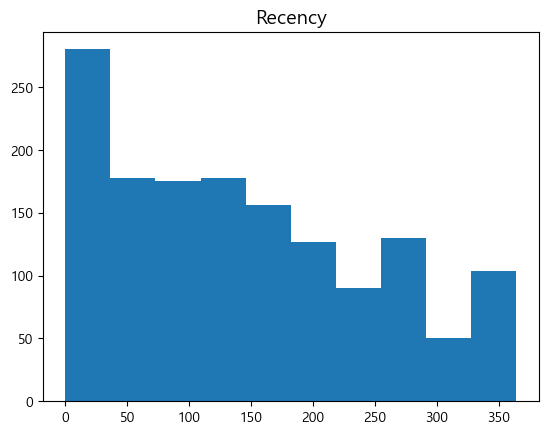

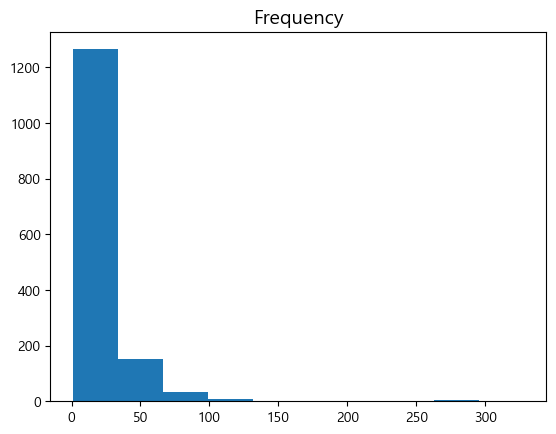

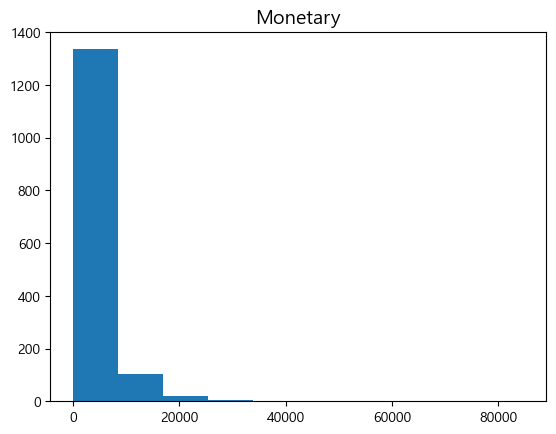

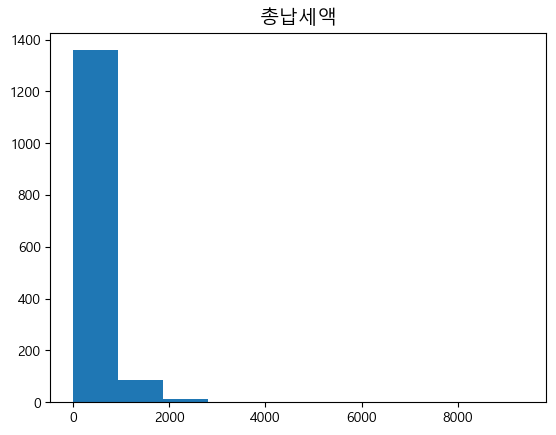

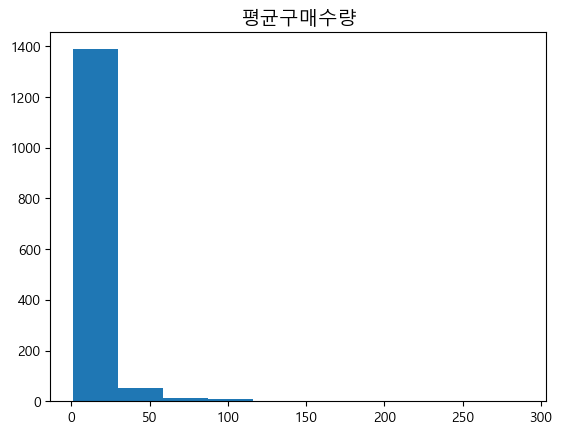

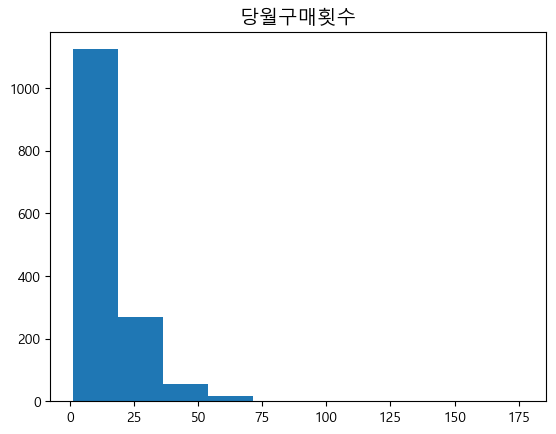

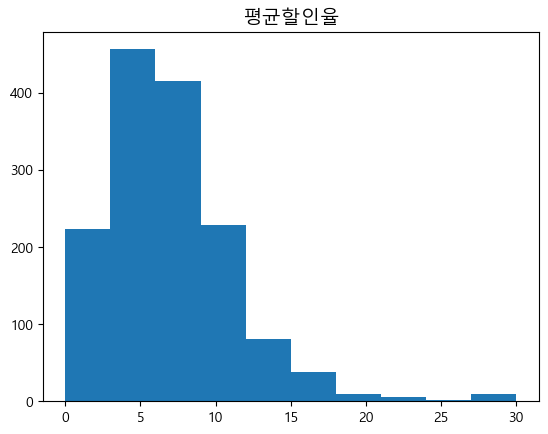

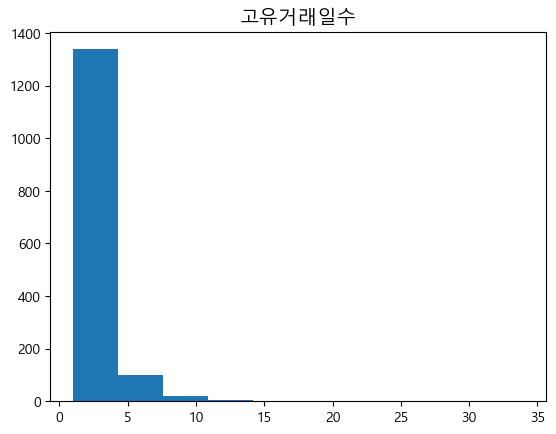

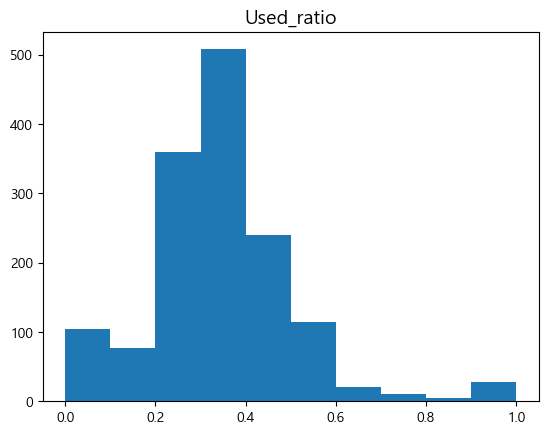

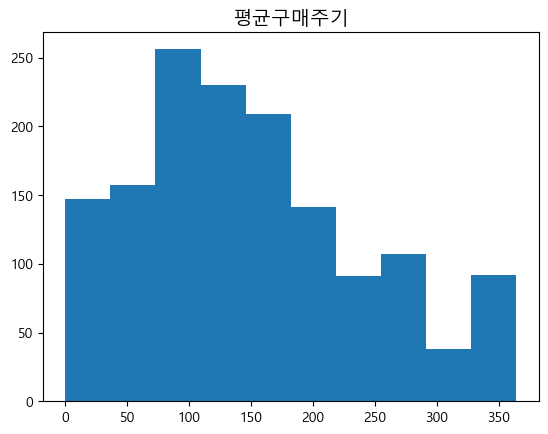

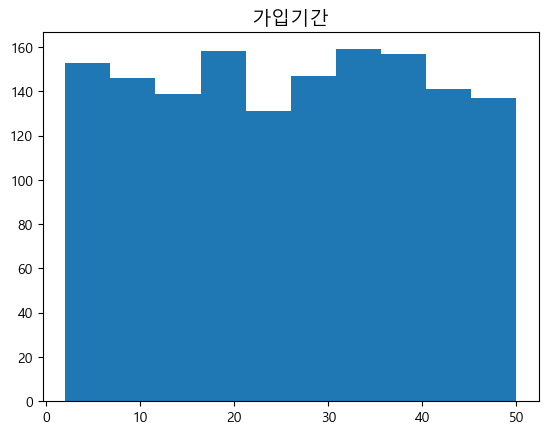

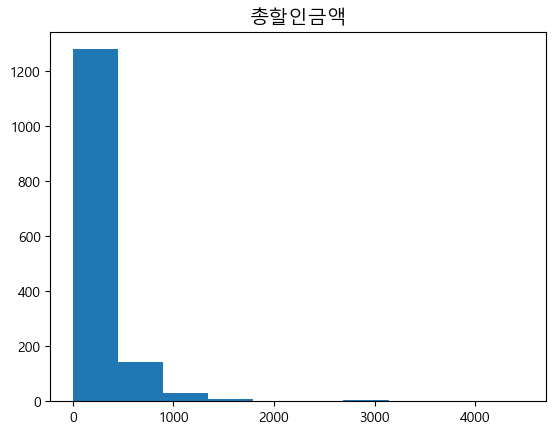

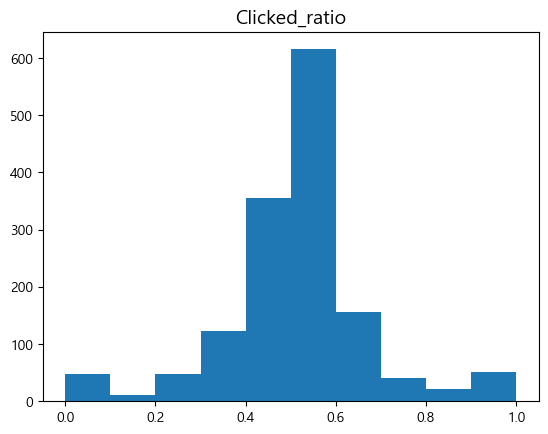

In [211]:
for col in rfm[['Recency','Frequency','Monetary','총납세액','평균구매수량', '당월구매횟수','평균할인율','고유거래일수','Used_ratio','평균구매주기', '가입기간', '총할인금액', 'Clicked_ratio']].columns:
    plt.hist(rfm[col])
    plt.title(col, fontsize=14)
    plt.show()

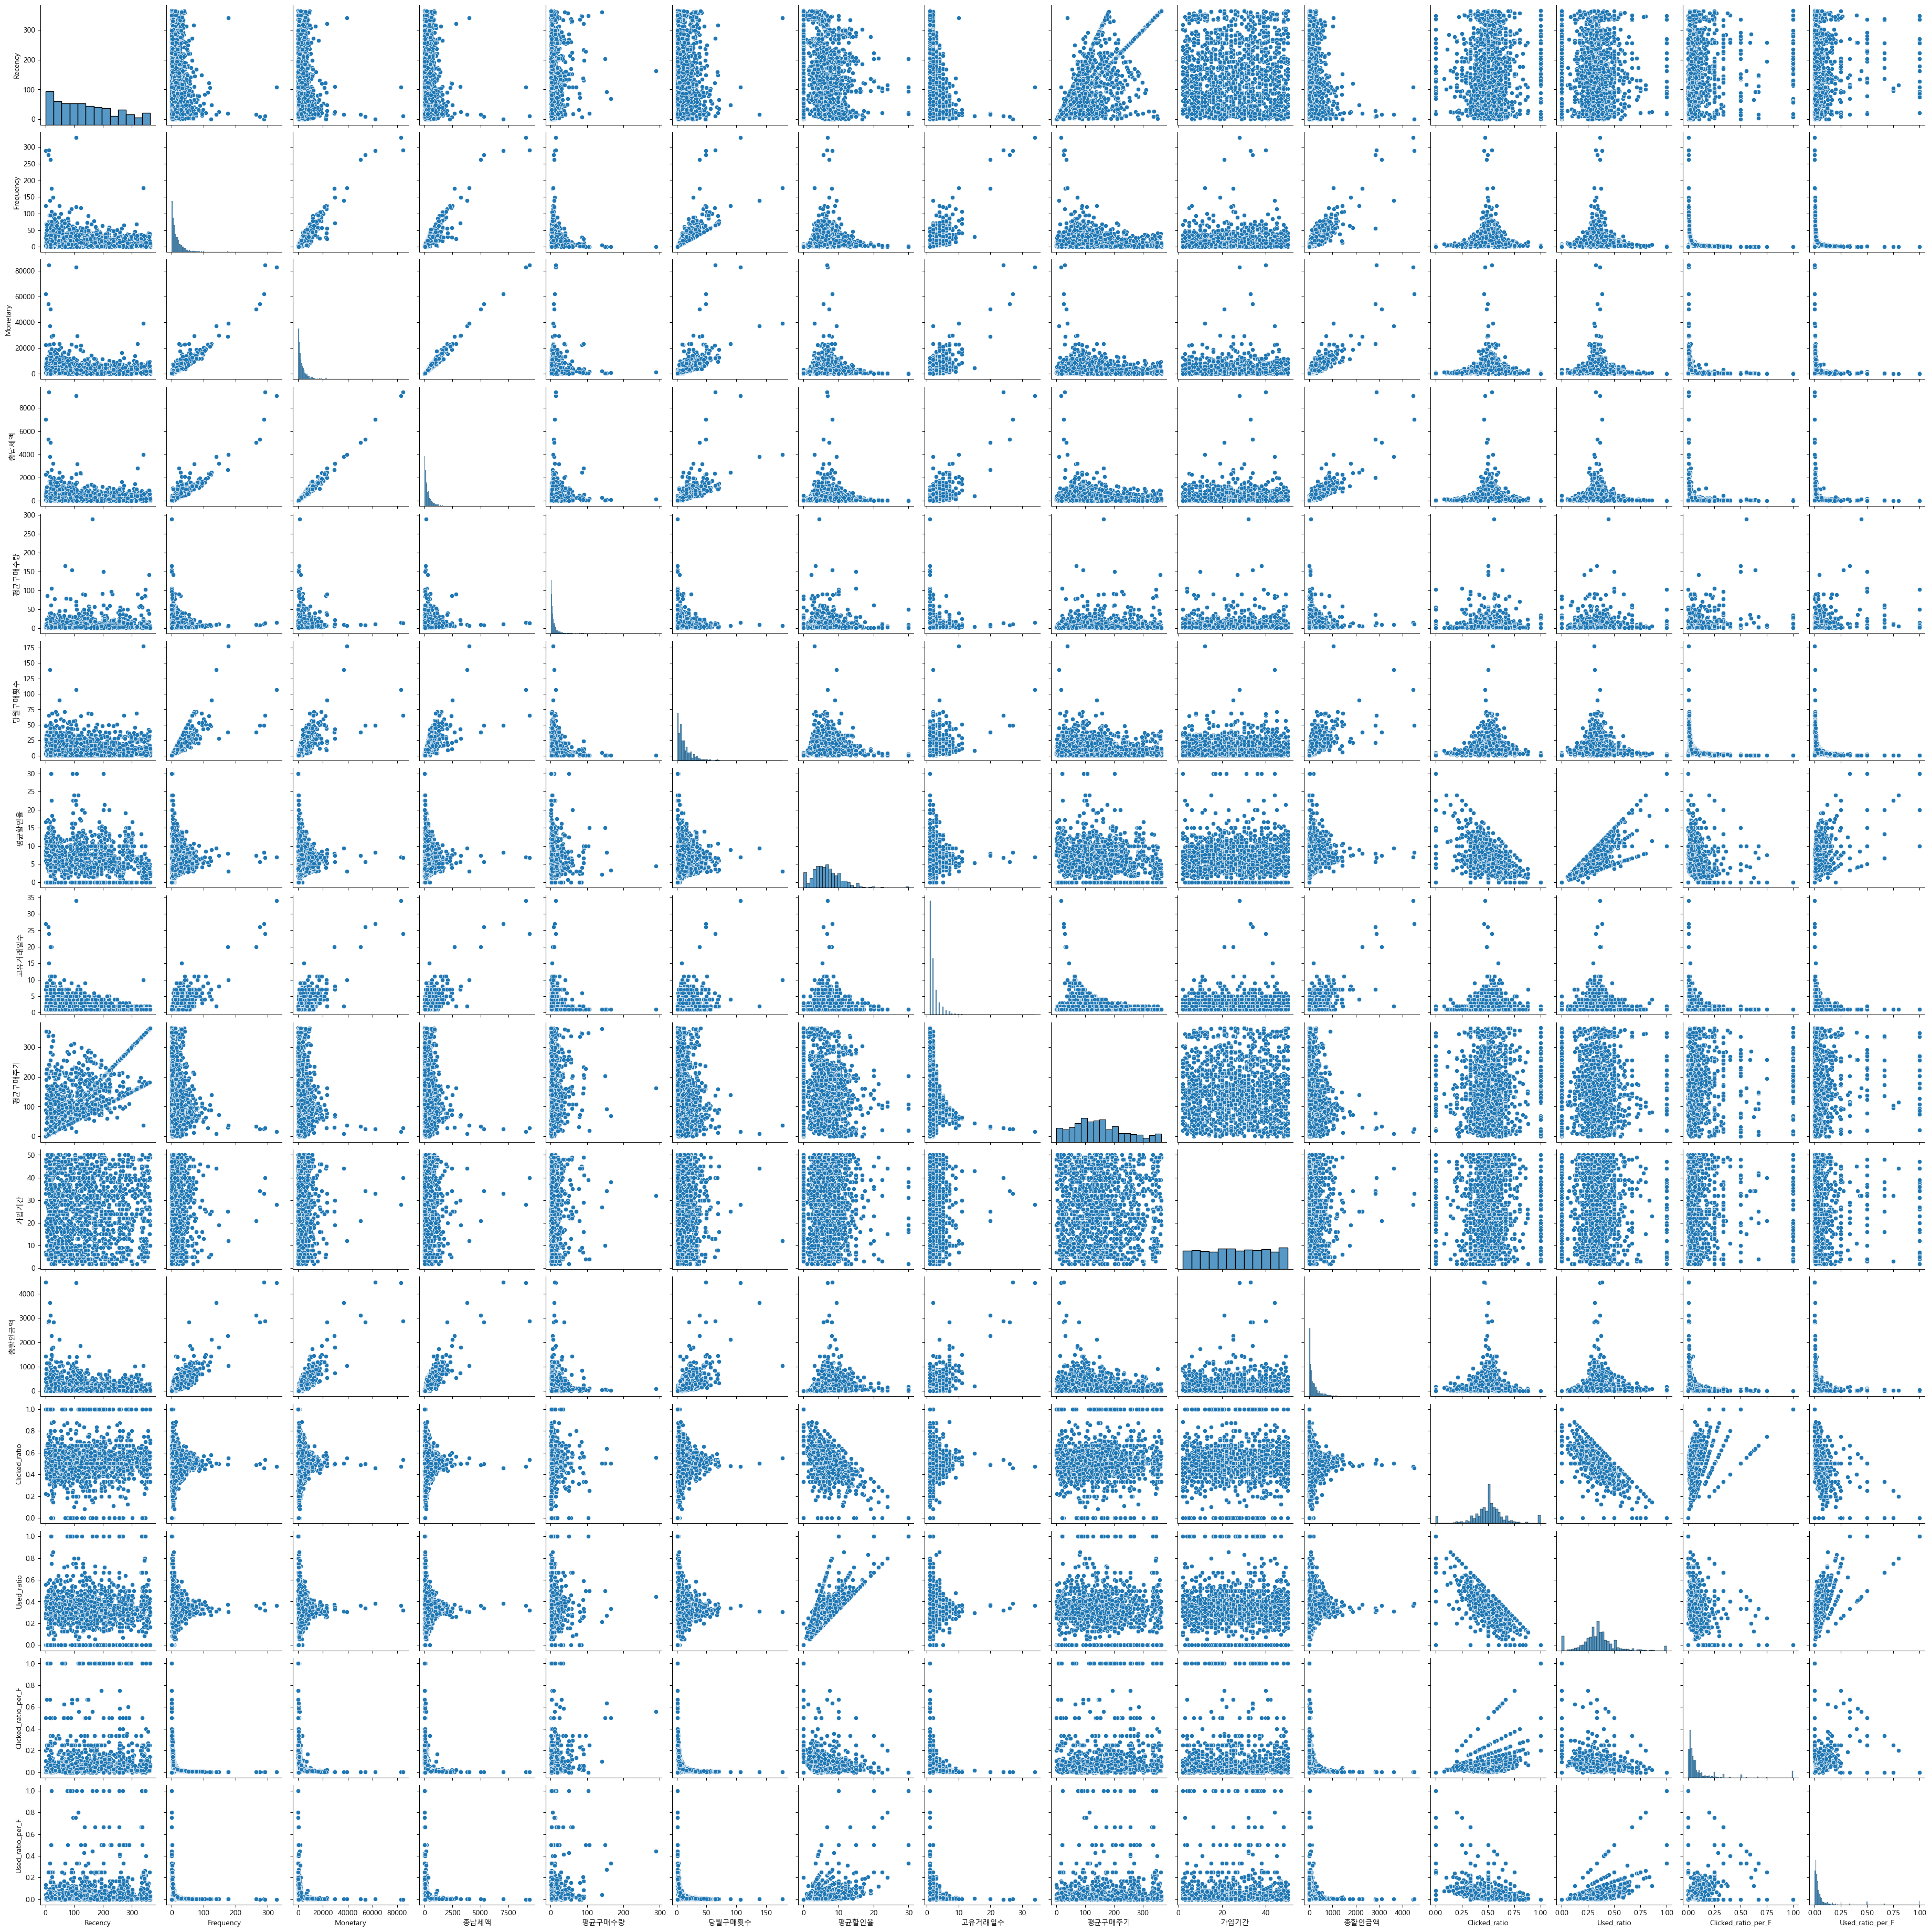

In [212]:
sns.pairplot(rfm[['Recency','Frequency','Monetary','총납세액','평균구매수량', '당월구매횟수','평균할인율','고유거래일수','평균구매주기', '가입기간', '총할인금액', 'Clicked_ratio','Used_ratio', 'Clicked_ratio_per_F','Used_ratio_per_F']])

In [213]:
core = rfm[['Recency','Frequency','Monetary','총납세액','평균구매수량', '당월구매횟수','평균할인율','고유거래일수','평균구매주기', '가입기간', '총할인금액', 'Clicked_ratio','Used_ratio', 'Clicked_ratio_per_F','Used_ratio_per_F']].corr(method='pearson', min_periods=1)

In [214]:
for i in core.index:
    display(pd.DataFrame(core.loc[i, :]))

Recency
Recency              1.000000
Frequency           -0.218934
Monetary            -0.204182
총납세액                -0.176565
평균구매수량               0.059750
당월구매횟수              -0.109909
평균할인율               -0.179300
고유거래일수              -0.301409
평균구매주기               0.762261
가입기간                 0.022597
총할인금액               -0.261245
Clicked_ratio        0.005457
Used_ratio          -0.010367
Clicked_ratio_per_F  0.146239
Used_ratio_per_F     0.126459

Frequency
Recency              -0.218934
Frequency             1.000000
Monetary              0.949483
총납세액                  0.934530
평균구매수량               -0.029558
당월구매횟수                0.780587
평균할인율                -0.003628
고유거래일수                0.770677
평균구매주기               -0.228328
가입기간                  0.009821
총할인금액                 0.871212
Clicked_ratio        -0.000363
Used_ratio           -0.002992
Clicked_ratio_per_F  -0.288763
Used_ratio_per_F     -0.236846

Monetary
Recency             -0.204182
Frequency            0.949483
Monetary             1.000000
총납세액                 0.991906
평균구매수량               0.062289
당월구매횟수               0.725124
평균할인율               -0.018136
고유거래일수               0.751528
평균구매주기              -0.210503
가입기간                 0.017448
총할인금액                0.880622
Clicked_ratio        0.001487
Used_ratio          -0.008843
Clicked_ratio_per_F -0.254193
Used_ratio_per_F    -0.209667

총납세액
Recency             -0.176565
Frequency            0.934530
Monetary             0.991906
총납세액                 1.000000
평균구매수량               0.082382
당월구매횟수               0.698204
평균할인율               -0.010935
고유거래일수               0.748467
평균구매주기              -0.190564
가입기간                 0.017733
총할인금액                0.873834
Clicked_ratio       -0.000734
Used_ratio          -0.005600
Clicked_ratio_per_F -0.241954
Used_ratio_per_F    -0.199179

평균구매수량
Recency              0.059750
Frequency           -0.029558
Monetary             0.062289
총납세액                 0.082382
평균구매수량               1.000000
당월구매횟수              -0.050261
평균할인율               -0.006243
고유거래일수              -0.015919
평균구매주기               0.056418
가입기간                 0.006285
총할인금액                0.040286
Clicked_ratio       -0.013023
Used_ratio           0.019981
Clicked_ratio_per_F  0.061930
Used_ratio_per_F     0.116160

당월구매횟수
Recency             -0.109909
Frequency            0.780587
Monetary             0.725124
총납세액                 0.698204
평균구매수량              -0.050261
당월구매횟수               1.000000
평균할인율               -0.008056
고유거래일수               0.362713
평균구매주기              -0.211365
가입기간                 0.004014
총할인금액                0.672655
Clicked_ratio        0.002207
Used_ratio          -0.009130
Clicked_ratio_per_F -0.356532
Used_ratio_per_F    -0.292781

평균할인율
Recency             -0.179300
Frequency           -0.003628
Monetary            -0.018136
총납세액                -0.010935
평균구매수량              -0.006243
당월구매횟수              -0.008056
평균할인율                1.000000
고유거래일수              -0.005531
평균구매주기              -0.164301
가입기간                 0.032213
총할인금액                0.148858
Clicked_ratio       -0.546218
Used_ratio           0.734804
Clicked_ratio_per_F -0.306843
Used_ratio_per_F     0.444329

고유거래일수
Recency             -0.301409
Frequency            0.770677
Monetary             0.751528
총납세액                 0.748467
평균구매수량              -0.015919
당월구매횟수               0.362713
평균할인율               -0.005531
고유거래일수               1.000000
평균구매주기              -0.274333
가입기간                 0.002248
총할인금액                0.673331
Clicked_ratio        0.005323
Used_ratio          -0.004584
Clicked_ratio_per_F -0.209633
Used_ratio_per_F    -0.172272

평균구매주기
Recency              0.762261
Frequency           -0.228328
Monetary            -0.210503
총납세액                -0.190564
평균구매수량               0.056418
당월구매횟수              -0.211365
평균할인율               -0.164301
고유거래일수              -0.274333
평균구매주기               1.000000
가입기간                 0.020238
총할인금액               -0.235893
Clicked_ratio        0.005393
Used_ratio          -0.003667
Clicked_ratio_per_F  0.141675
Used_ratio_per_F     0.120293

가입기간
Recency              0.022597
Frequency            0.009821
Monetary             0.017448
총납세액                 0.017733
평균구매수량               0.006285
당월구매횟수               0.004014
평균할인율                0.032213
고유거래일수               0.002248
평균구매주기               0.020238
가입기간                 1.000000
총할인금액                0.028204
Clicked_ratio       -0.001762
Used_ratio          -0.004933
Clicked_ratio_per_F -0.018101
Used_ratio_per_F    -0.010561

총할인금액
Recency             -0.261245
Frequency            0.871212
Monetary             0.880622
총납세액                 0.873834
평균구매수량               0.040286
당월구매횟수               0.672655
평균할인율                0.148858
고유거래일수               0.673331
평균구매주기              -0.235893
가입기간                 0.028204
총할인금액                1.000000
Clicked_ratio       -0.050584
Used_ratio           0.058962
Clicked_ratio_per_F -0.255583
Used_ratio_per_F    -0.193370

Clicked_ratio
Recency                   0.005457
Frequency                -0.000363
Monetary                  0.001487
총납세액                     -0.000734
평균구매수량                   -0.013023
당월구매횟수                    0.002207
평균할인율                    -0.546218
고유거래일수                    0.005323
평균구매주기                    0.005393
가입기간                     -0.001762
총할인금액                    -0.050584
Clicked_ratio             1.000000
Used_ratio               -0.738013
Clicked_ratio_per_F       0.553576
Used_ratio_per_F         -0.484249

Used_ratio
Recency               -0.010367
Frequency             -0.002992
Monetary              -0.008843
총납세액                  -0.005600
평균구매수량                 0.019981
당월구매횟수                -0.009130
평균할인율                  0.734804
고유거래일수                -0.004584
평균구매주기                -0.003667
가입기간                  -0.004933
총할인금액                  0.058962
Clicked_ratio         -0.738013
Used_ratio             1.000000
Clicked_ratio_per_F   -0.396884
Used_ratio_per_F       0.663083

Clicked_ratio_per_F
Recency                         0.146239
Frequency                      -0.288763
Monetary                       -0.254193
총납세액                           -0.241954
평균구매수량                          0.061930
당월구매횟수                         -0.356532
평균할인율                          -0.306843
고유거래일수                         -0.209633
평균구매주기                          0.141675
가입기간                           -0.018101
총할인금액                          -0.255583
Clicked_ratio                   0.553576
Used_ratio                     -0.396884
Clicked_ratio_per_F             1.000000
Used_ratio_per_F                0.080252

Used_ratio_per_F
Recency                      0.126459
Frequency                   -0.236846
Monetary                    -0.209667
총납세액                        -0.199179
평균구매수량                       0.116160
당월구매횟수                      -0.292781
평균할인율                        0.444329
고유거래일수                      -0.172272
평균구매주기                       0.120293
가입기간                        -0.010561
총할인금액                       -0.193370
Clicked_ratio               -0.484249
Used_ratio                   0.663083
Clicked_ratio_per_F          0.080252
Used_ratio_per_F             1.000000

In [215]:
label_r = [4, 3, 2, 1]
label_f = [1, 2, 3, 4]
label_m = [1, 2, 3, 4]

## EDA
## bins를 만들 때
## 각 컬럼의 히스토그램과 boxplot 등을 봤을 때
## 특정 구간에 밀도가 너무 높아서
## 그 구간을 다시 분할하여 bins 를 생성

# recency_score bins=[0, 70, 180, 280, 364]

rfm["recency_score"] = pd.cut(rfm["Recency"], bins=[0, 30, 90, 180, 364], labels=label_r, include_lowest=True)
rfm["frequency_score"] = pd.cut(rfm["Frequency"], bins=[0, 12, 25, 53, 329], labels=label_f, include_lowest=True)
rfm["monetary_score"] = pd.cut(rfm["Monetary"], bins=[0, 760, 1750, 7594, 90000], labels=label_m, include_lowest=True)
rfm["RFM_SCORE"] = rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str) + rfm["monetary_score"].astype(str)

In [216]:
seg_map = {
    r'[1-2]1[1-4]': 'Hibernating',          # 1
    r'[1-2]2[1-4]': 'About to Sleep',       # 2
    r'[1-2][3-4][1-4]': 'At Risk',          # 3
    r'3[1-2][1-4]': 'Can\'t Lose',          # 4
    r'3[3-4][1-4]': 'Typical',              # 5
    r'4[1-2][1-2]': 'New Customers',        # 6
    r'4[1-2][3-4]': 'Loyal Customers',      # 7
    r'4[3-4][1-3]': 'Loyal Customers',      # 7
    r'4[3-4][4]': 'VIP'                     # 8
}

rfm['Segmentation'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)

In [217]:
indexing = ['VIP',
            'Loyal Customers',
            'Typical',
            'New Customers',
            'At Risk',
            'Can\'t Lose',
            'About to Sleep',
            'Hibernating'
            ]

In [218]:
seg_stats = pd.DataFrame((rfm['Segmentation'].value_counts()/ rfm['Segmentation'].count()).round(4)*100)

In [219]:
seg_stats.reindex(index=indexing)

count
Segmentation          
VIP               3.13
Loyal Customers   7.29
Typical           7.56
New Customers     5.65
At Risk          10.22
Can't Lose       13.62
About to Sleep   12.87
Hibernating      39.65

In [220]:
rfm.to_csv('user_feature.csv')

In [221]:
rfm.columns

Index(['고객ID', 'Recency', 'Frequency', 'Monetary', '총납세액', '평균구매수량', '최다구매월',
       '당월구매횟수', '평균할인율', '고유거래일수', '평균구매주기', 'First_category',
       'Second_category', 'Third_category', '성별', '고객지역', '가입기간', '총할인금액',
       'Clicked_ratio', 'Used_ratio', 'Used_ratio_per_F',
       'Clicked_ratio_per_F', 'recency_score', 'frequency_score',
       'monetary_score', 'RFM_SCORE', 'Segmentation'],
      dtype='object')

In [222]:
def month_shift(x):
    dict = {1:'Jan',
            2:'Feb',
            3:'Mar',
            4:'Apr',
            5:'May',
            6:'Jun',
            7:'Jul',
            8:'Aug',
            9:'Sep',
            10:'Oct',
            11:'Nov',
            12:'Dec'}
    
    return dict[x]

In [223]:
df.columns

Index(['고객ID', '거래ID', '거래날짜', '제품ID', '제품카테고리', '수량', '평균금액', '배송료', '쿠폰상태',
       '성별', '고객지역', '가입기간', 'GST', '월', '쿠폰코드', '할인율', '오프라인비용', '온라인비용',
       'true_discount', '평균배송료', '납세액', '총금액', 'real_discount', 'df총할인금액'],
      dtype='object')

Text(0.5, 1.0, '월별 최대매출 카테고리')

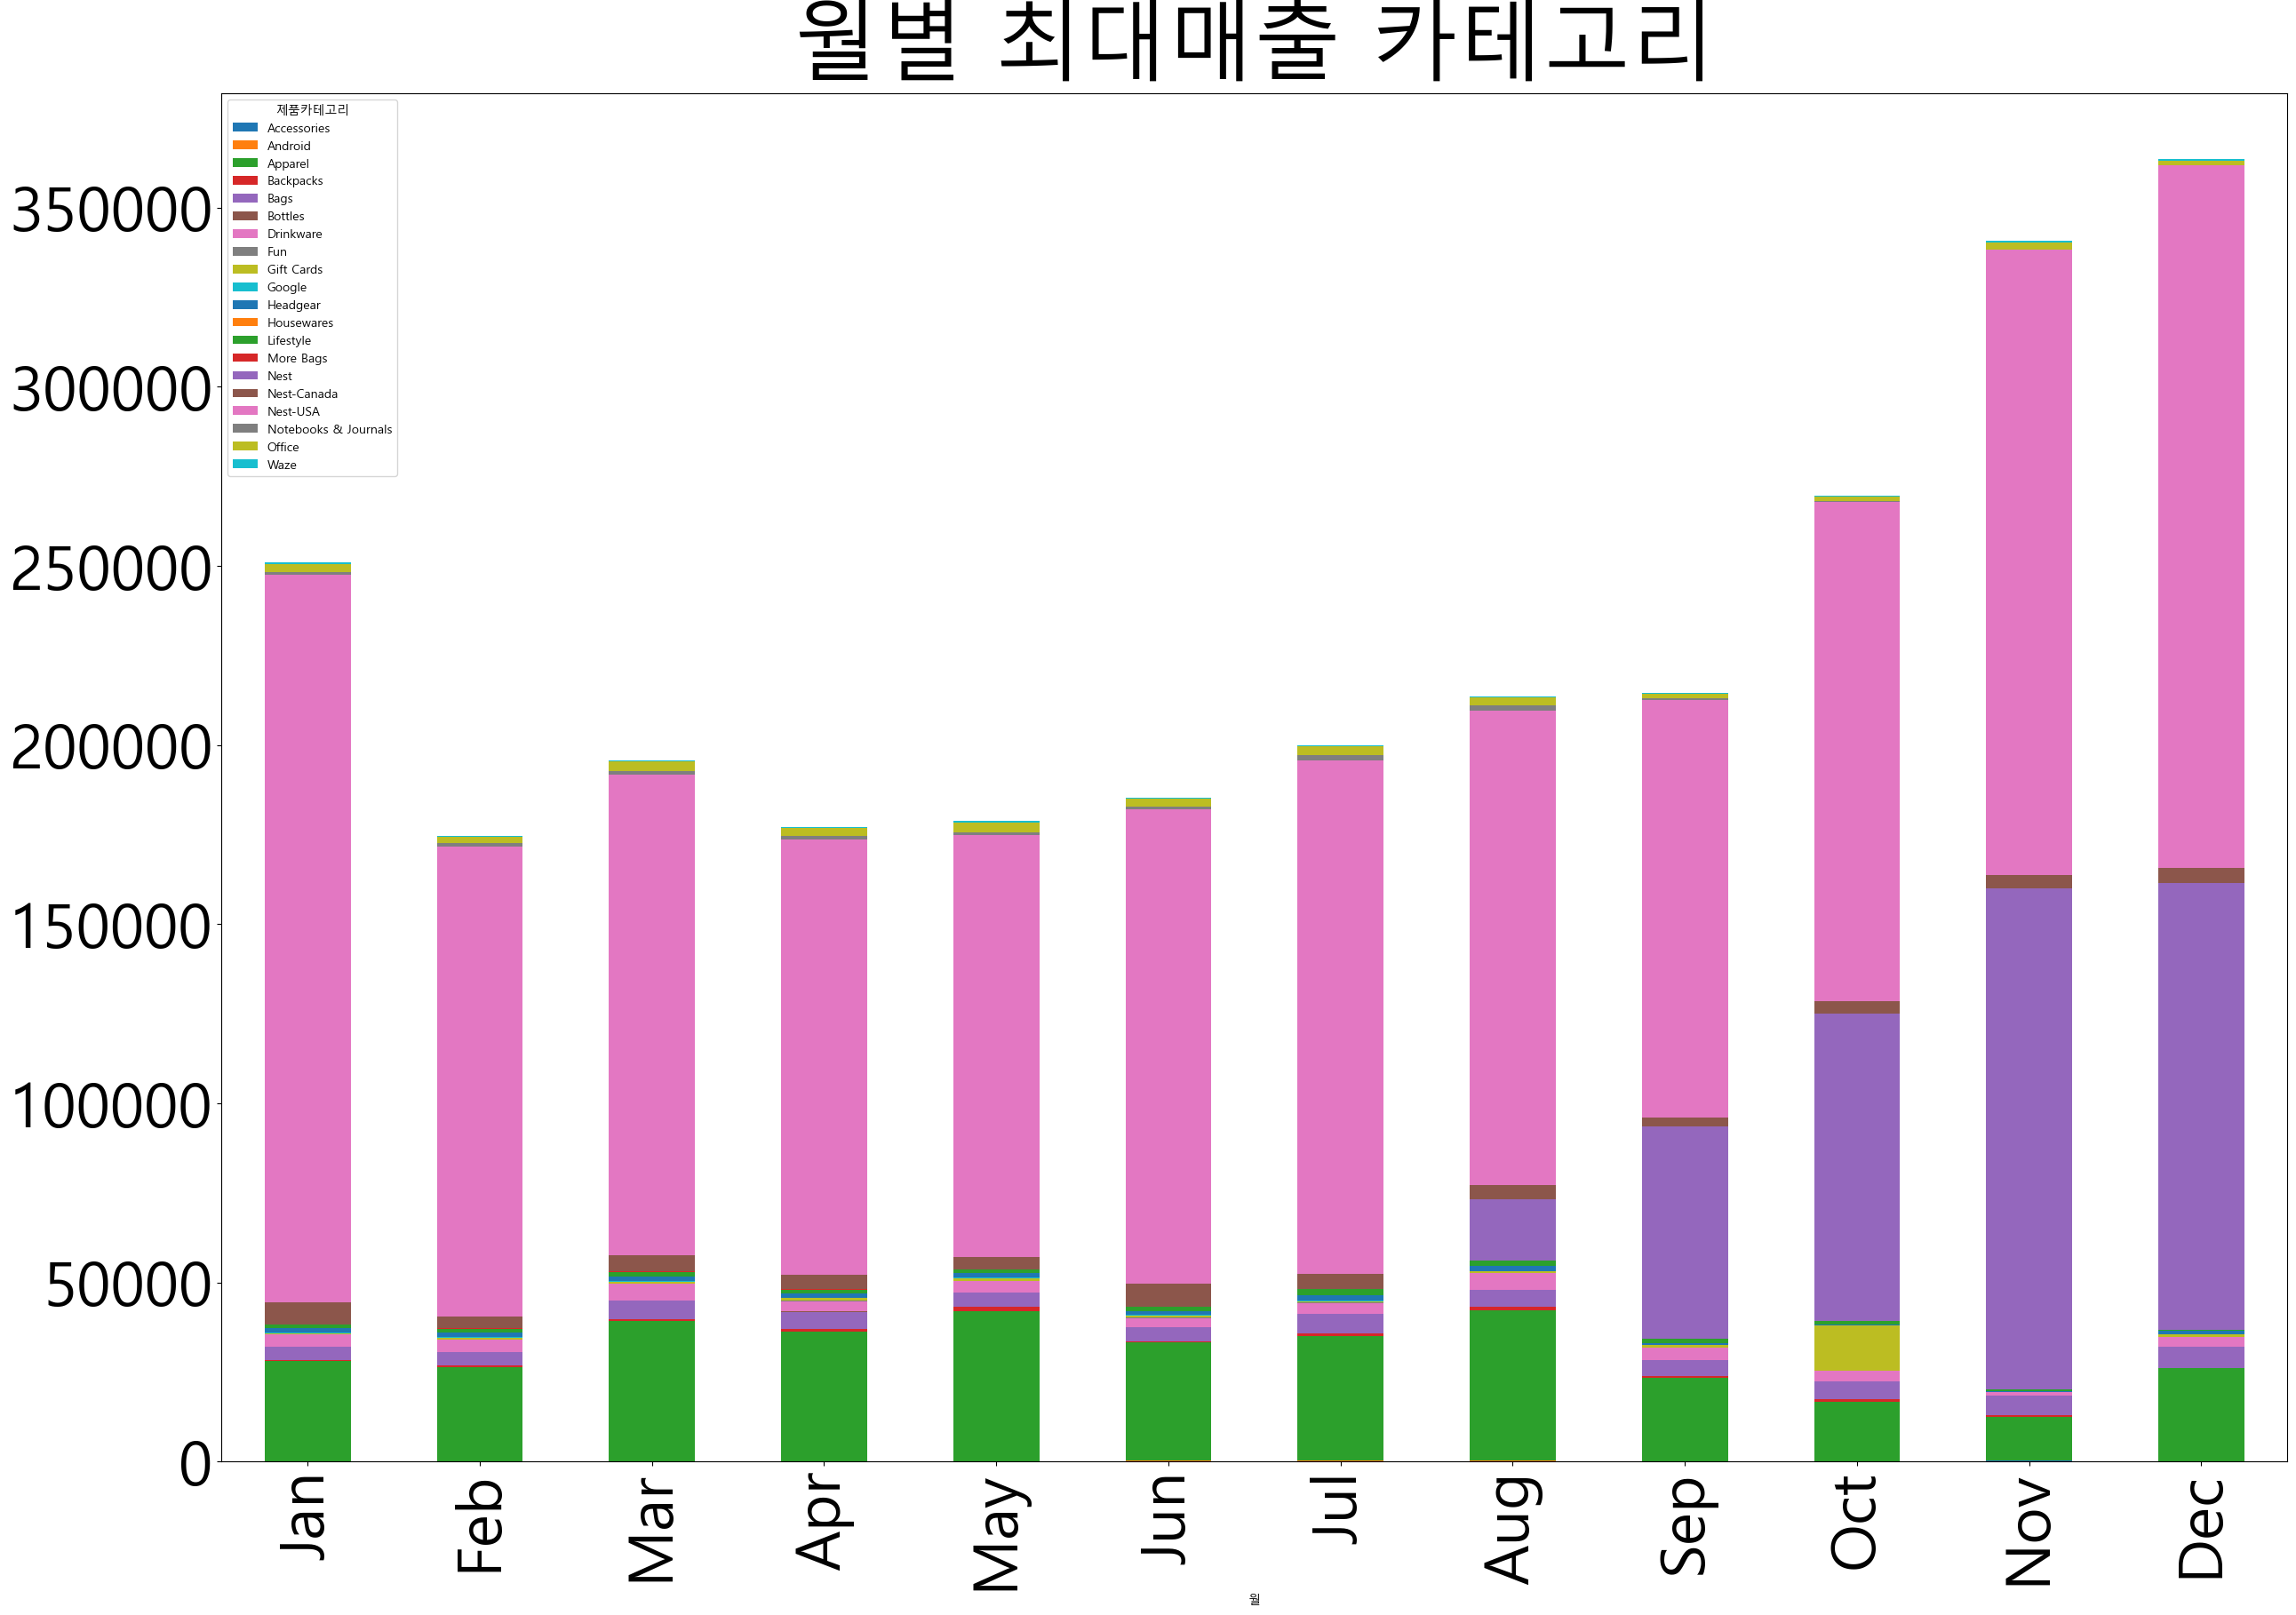

In [224]:
df.groupby(['월', '제품카테고리'])['평균금액'].sum().unstack(fill_value=0).reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar', stacked=True, figsize=[30, 20], fontsize=50)
plt.title('월별 최대매출 카테고리', fontsize=70)

Text(0.5, 1.0, '월별 최다구매 카테고리')

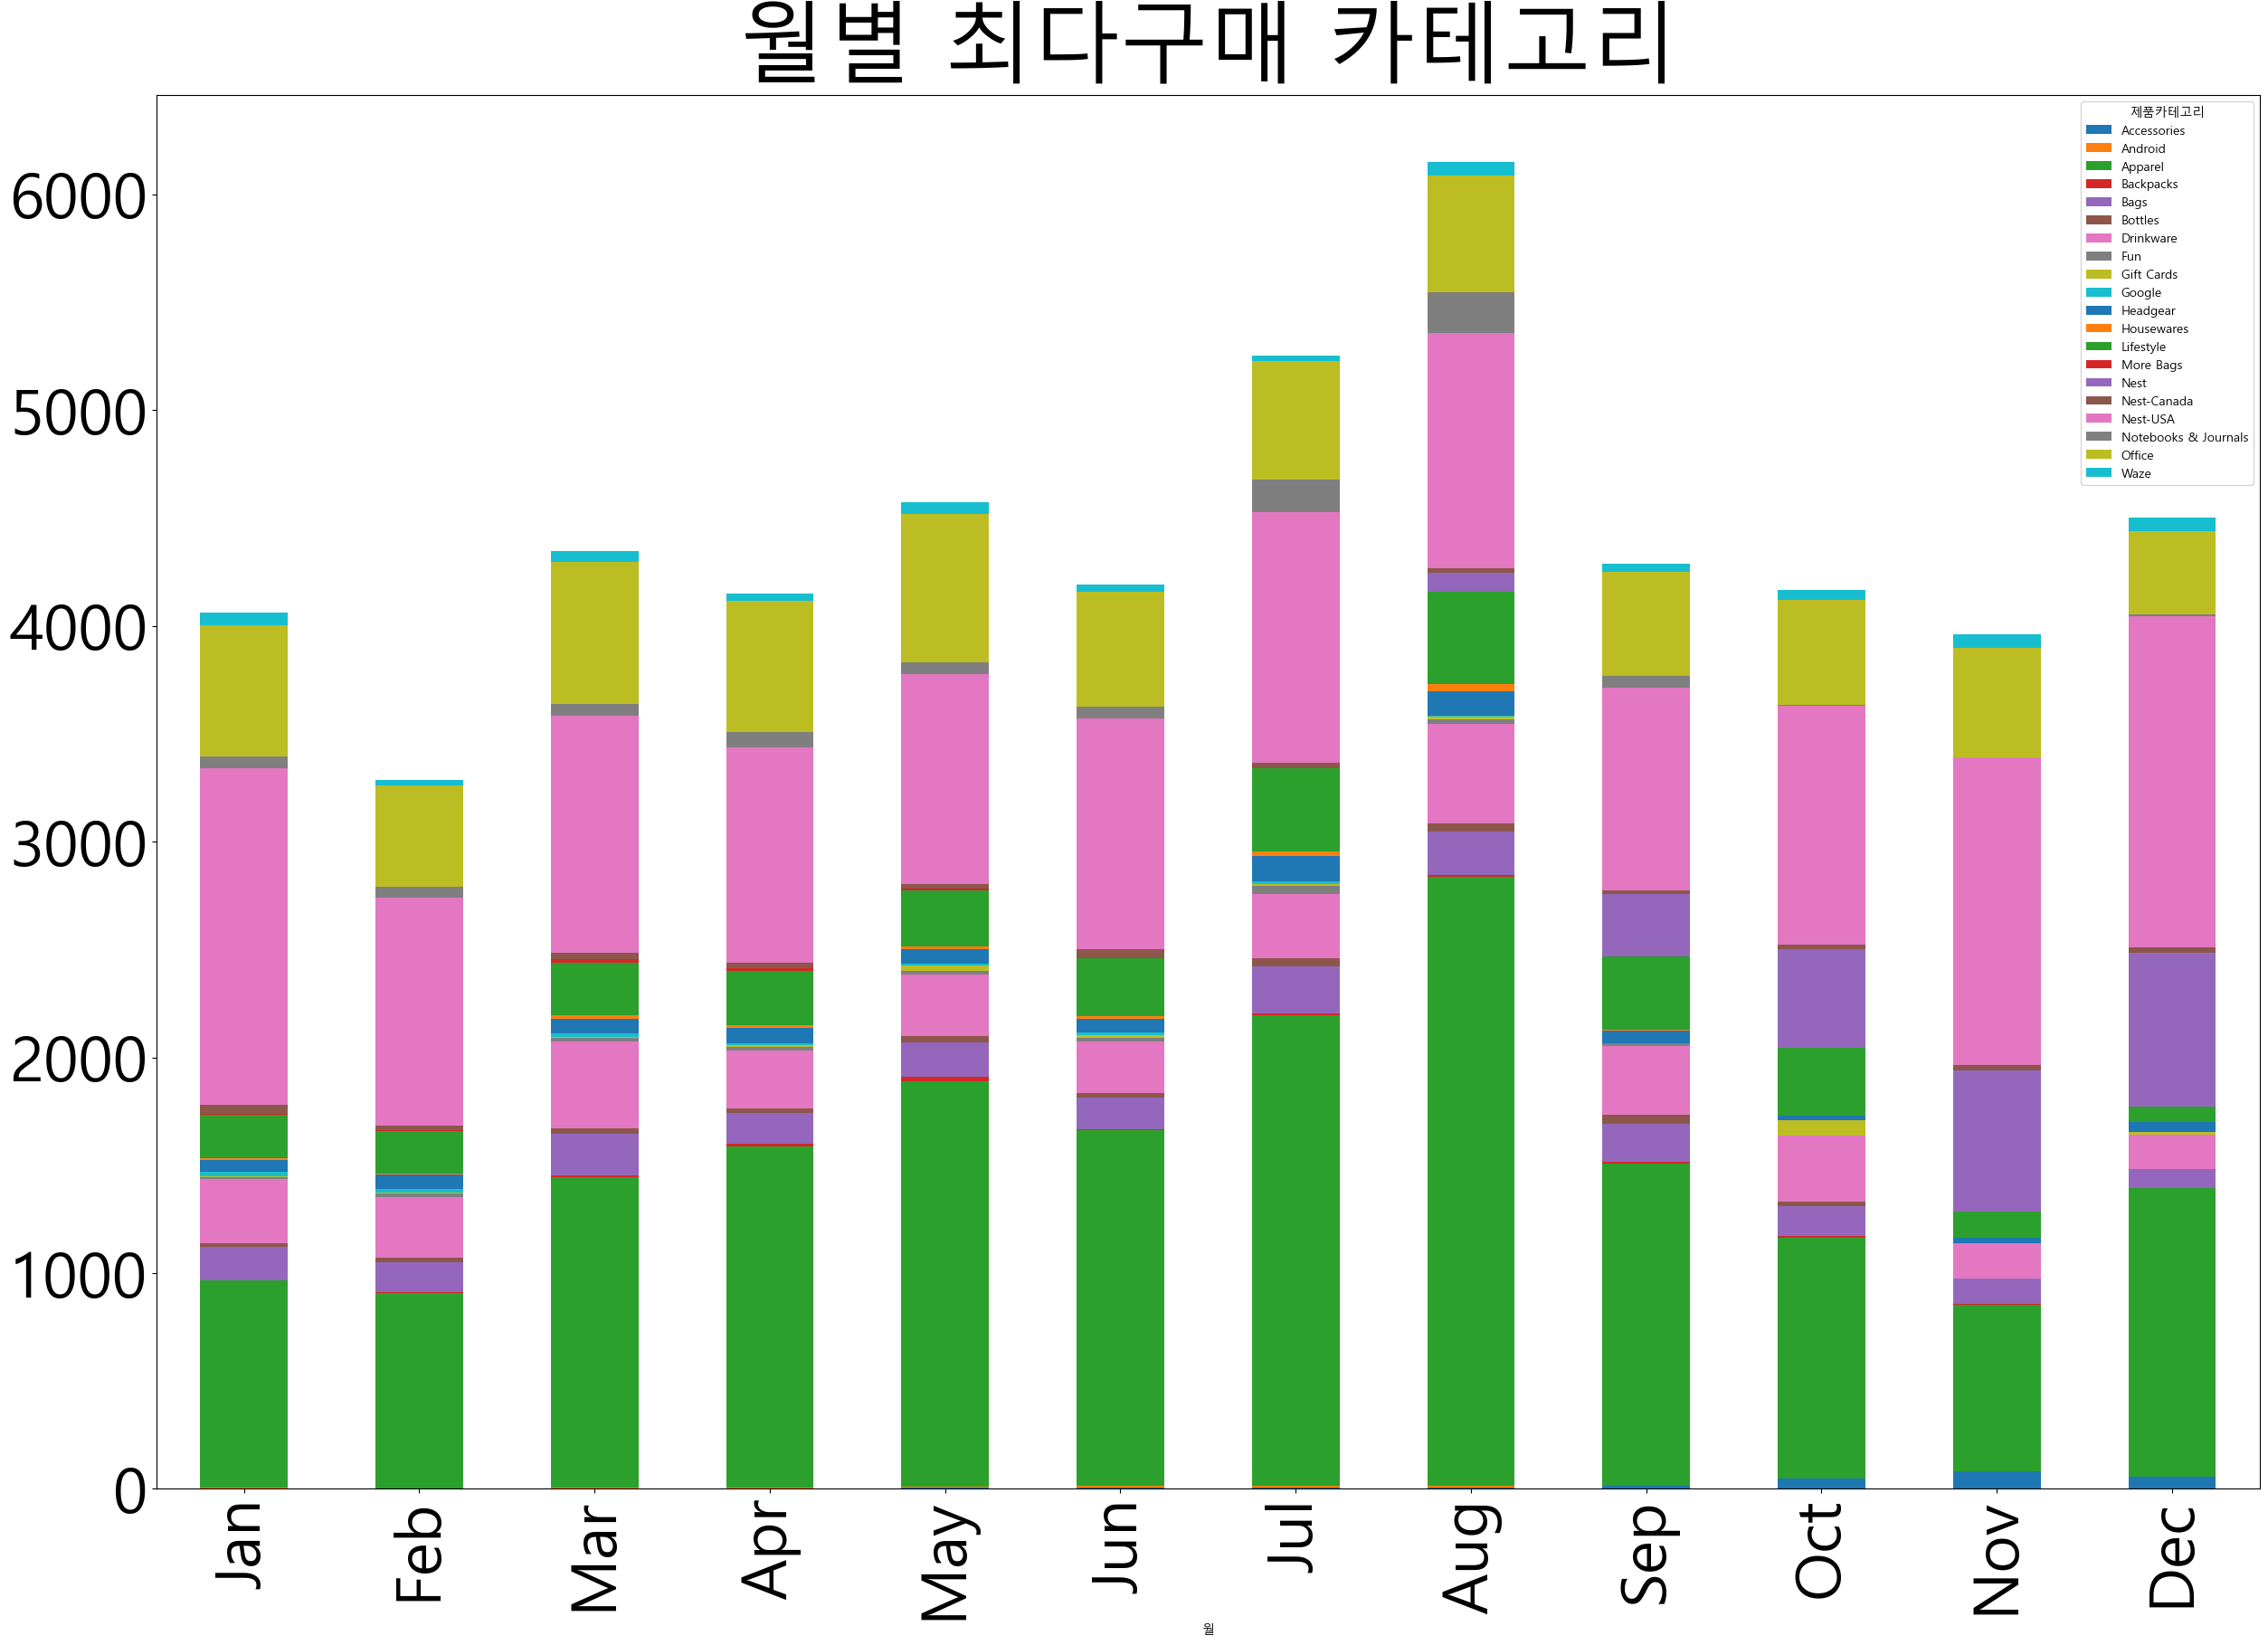

In [225]:
df.groupby(['월', '제품카테고리']).size().unstack(fill_value=0).reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar', stacked=True, figsize=[30, 20], fontsize=50)
plt.title('월별 최다구매 카테고리', fontsize=70)


In [226]:
user_feature_core = pd.DataFrame(rfm.groupby('Segmentation')[['총납세액','평균구매수량' ,'평균할인율' ,'고유거래일수', '평균구매주기', '가입기간', '총할인금액']].mean().reindex(index=indexing))
user_feature_core

총납세액     평균구매수량     평균할인율    고유거래일수      평균구매주기  \
Segmentation                                                              
VIP              1858.580372  11.968926  7.390435  7.391304   99.086957   
Loyal Customers   365.628813   7.542917  8.523925  3.028037   85.280374   
Typical           836.782486   7.704747  6.164234  3.720721  100.972973   
New Customers      77.317601   4.547885  9.465301  1.734940   46.325301   
At Risk           846.500443   9.466860  6.613467  2.993333  147.426667   
Can't Lose        207.854217   9.688639  5.224400  1.950000   92.315000   
About to Sleep    347.562559   9.613261  6.735450  1.915344  174.317460   
Hibernating        96.884352  10.867668  6.681856  1.350515  202.960481   

                      가입기간        총할인금액  
Segmentation                             
VIP              25.565217  1221.132500  
Loyal Customers  25.794393   292.576561  
Typical          25.864865   500.181252  
New Customers    27.638554    71.881795  
At Risk          24.980000   465.457153  
Can't Lose       24.960000   114.359050  
About to Sleep   27.253968   198.647296  
Hibernating      25.855670    54.250242

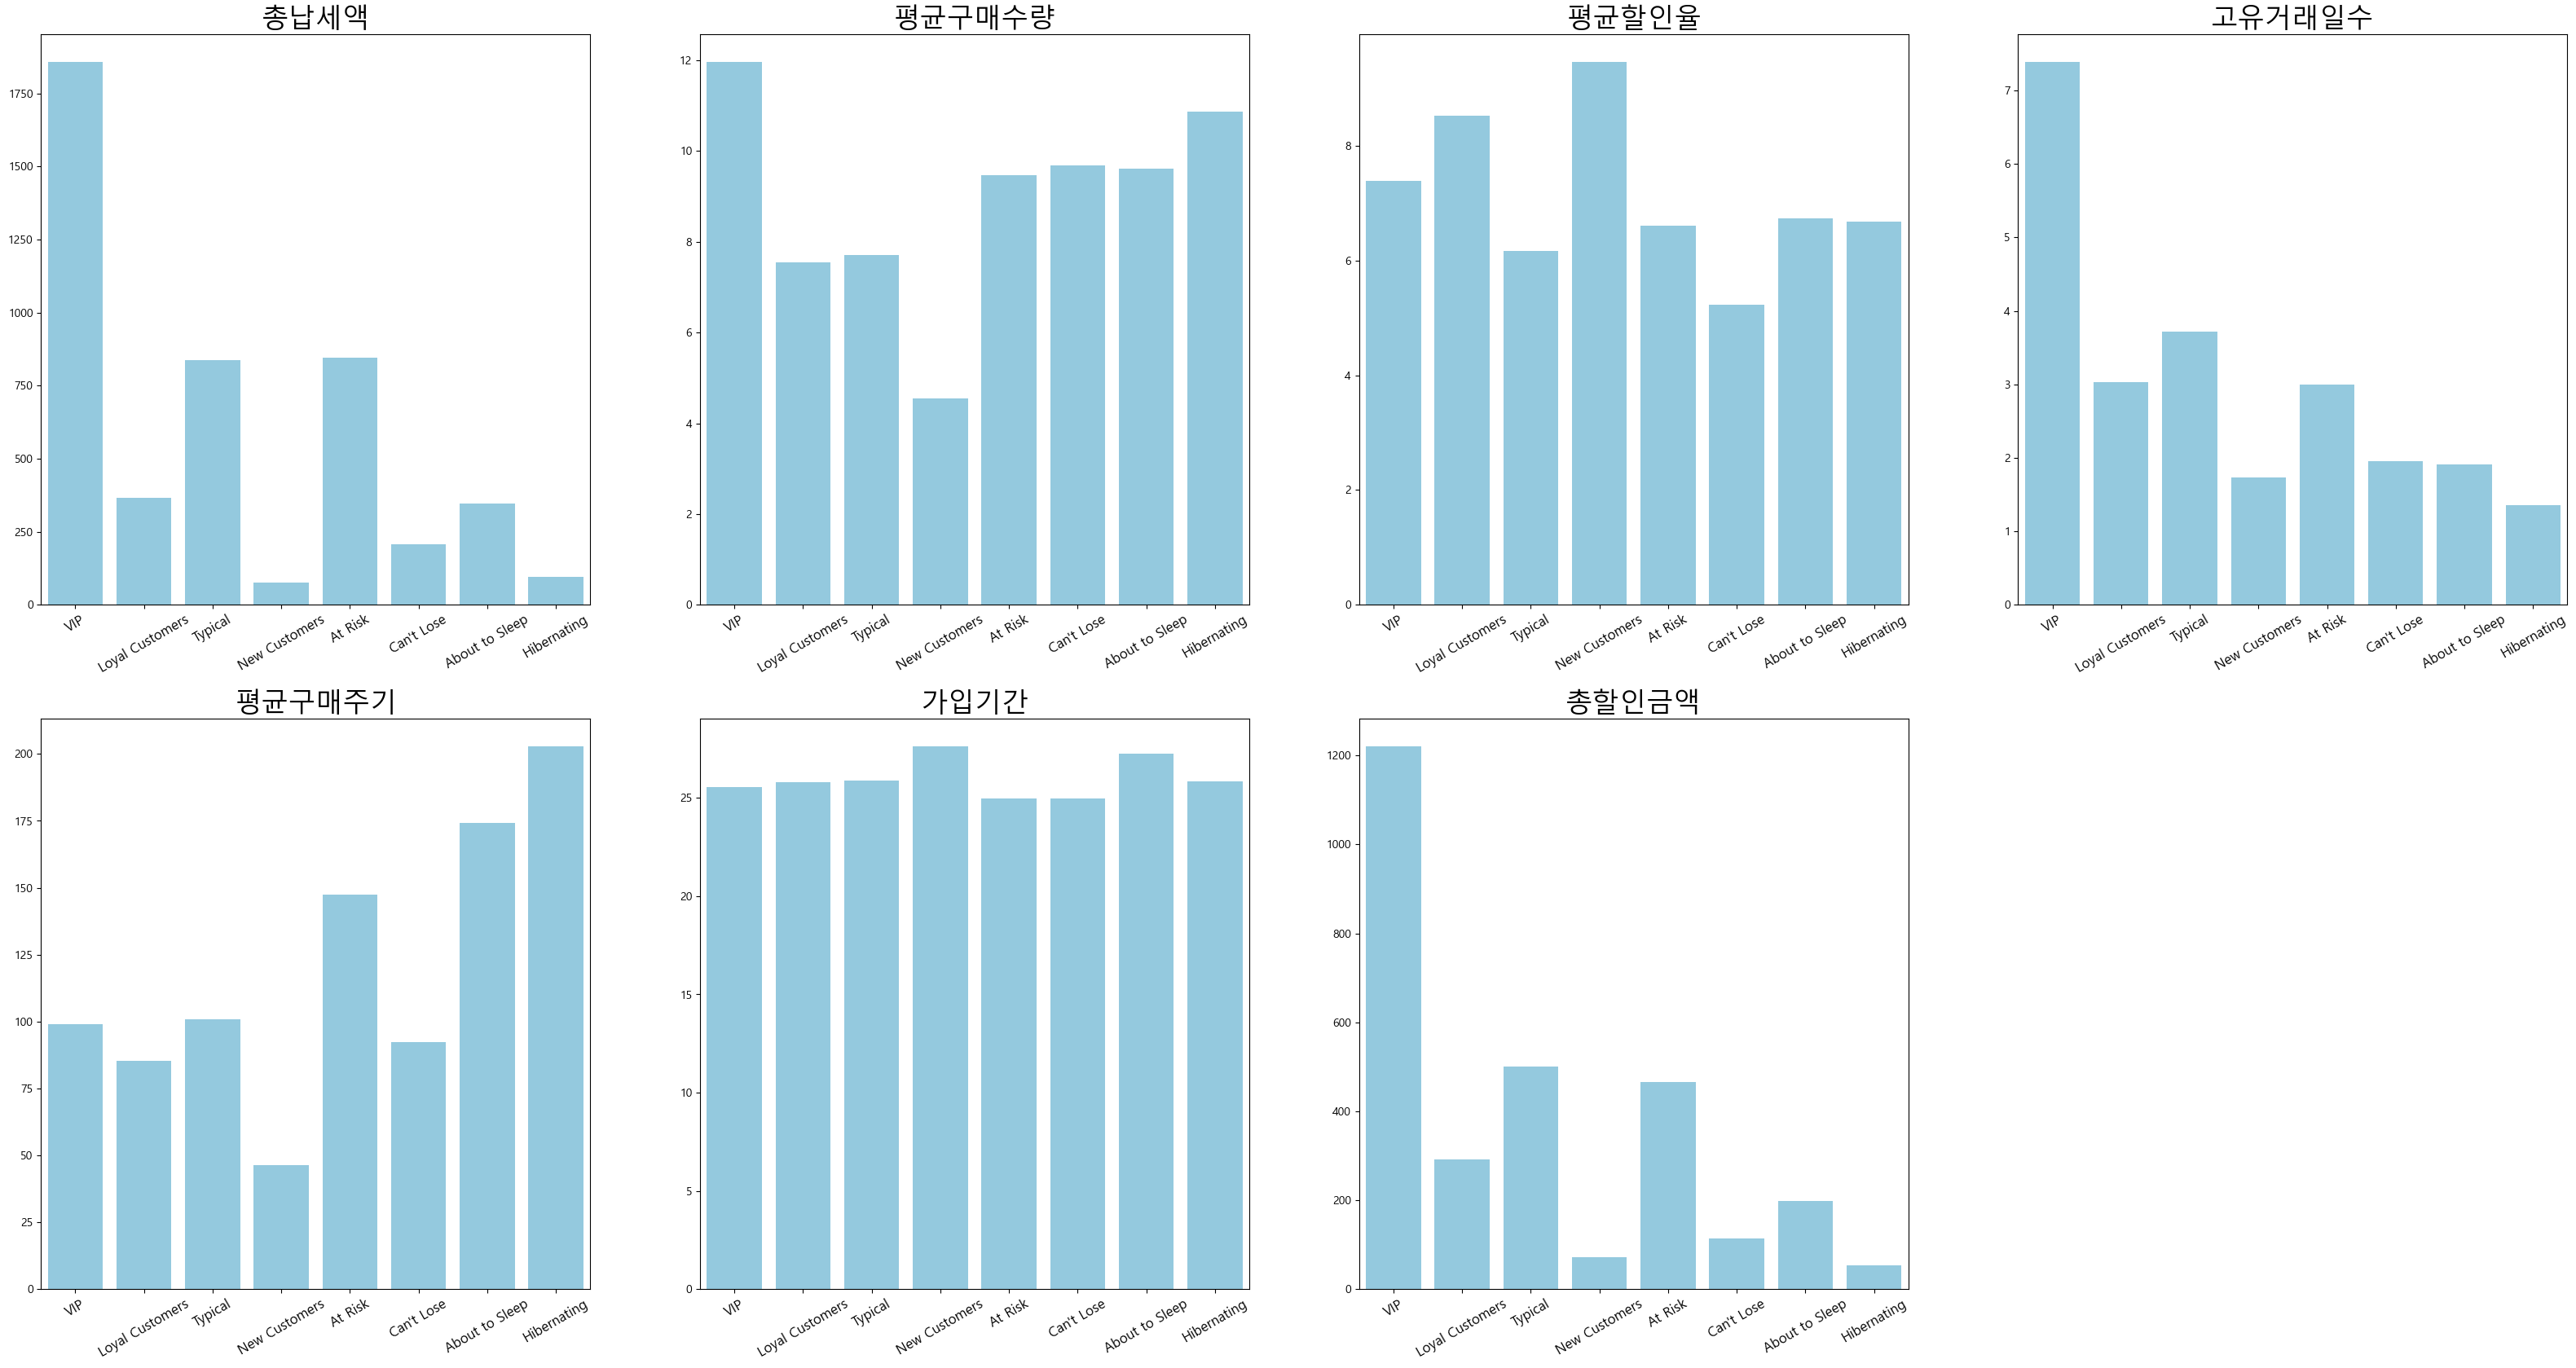

In [227]:
plt.figure(figsize=(40, 20))
for i, col in enumerate(user_feature_core.columns):
    plt.subplot(2, 4, i+1)
    sns.barplot(data=user_feature_core, x=user_feature_core.index, y=col, color='skyblue')
    plt.title(col, fontsize=24)
    plt.xticks(rotation=30, fontsize=12)
    plt.ylabel("")
    plt.xlabel("")

plt.show()

In [228]:
rfm

고객ID  Recency  Frequency    Monetary       총납세액     평균구매수량 최다구매월  \
0     USER_0000      107          1    101.3912     4.6982   3.000000   Sep   
1     USER_0001       59         31  15407.7190  2067.9070  11.032258   Nov   
2     USER_0002       73          8   1596.0858   203.6008  26.125000   Jun   
3     USER_0003       17         11   1438.5072   148.2642   1.909091   Dec   
4     USER_0004      107         13   1541.9718   151.7598   4.307692   Sep   
...         ...      ...        ...         ...        ...        ...   ...   
1463  USER_1463      270          3    678.7202    51.2202  15.333333   Apr   
1464  USER_1464       87         19   2631.9586   277.1706   7.421053   Aug   
1465  USER_1465      194          2    128.5234    18.0264   5.000000   Apr   
1466  USER_1466       69          1    333.8000    29.8000   2.000000   Oct   
1467  USER_1467       82         53   7000.0783   583.1923   2.924528   Oct   

      당월구매횟수  평균할인율  고유거래일수  평균구매주기 First_category       Second_category  \
0          1  30.00       1     107        Apparel                Office   
1         18   8.00       3     168       Nest-USA               Apparel   
2          4  11.74       2     155         Office             Lifestyle   
3         11  10.59       1      17        Apparel              Nest-USA   
4         13   9.17       1     107        Apparel                Office   
...      ...    ...     ...     ...            ...                   ...   
1463       3   4.29       1     270        Apparel  Notebooks & Journals   
1464      10   9.25       3      99        Apparel              Nest-USA   
1465       1   3.75       2     173        Apparel                Office   
1466       1   0.00       1      69       Nest-USA                  None   
1467      31   3.73       2     114        Apparel              Nest-USA   

     Third_category 성별        고객지역  가입기간    총할인금액  Clicked_ratio  Used_ratio  \
0              None  여    New York    31    9.297       0.000000    1.000000   
1            Office  남    New York    20  781.548       0.433333    0.333333   
2           Apparel  남  California    39  130.705       0.478261    0.478261   
3       Nest-Canada  남  California    25  152.217       0.470588    0.352941   
4          Nest-USA  여     Chicago    31  206.748       0.472222    0.305556   
...             ... ..         ...   ...      ...            ...         ...   
1463      More Bags  여  California     5   11.190       0.428571    0.428571   
1464         Office  남    New York    43  230.312       0.525000    0.400000   
1465           None  남     Chicago    25    3.563       0.500000    0.375000   
1466           None  여     Chicago    47    0.000       0.000000    0.000000   
1467         Office  여  New Jersey    36  283.754       0.500000    0.372549   

      Used_ratio_per_F  Clicked_ratio_per_F recency_score frequency_score  \
0             1.000000             0.000000             2               1   
1             0.010753             0.013978             3               3   
2             0.059783             0.059783             3               1   
3             0.032086             0.042781             4               1   
4             0.023504             0.036325             2               2   
...                ...                  ...           ...             ...   
1463          0.142857             0.142857             1               1   
1464          0.021053             0.027632             3               2   
1465          0.187500             0.250000             1               1   
1466          0.000000             0.000000             3               1   
1467          0.007029             0.009434             3               3   

     monetary_score RFM_SCORE    Segmentation  
0                 1       211     Hibernating  
1                 4       334         Typical  
2                 2       312      Can't Lose  
3                 2       412   New Customers  
4                 2    

In [229]:
rfm.columns

Index(['고객ID', 'Recency', 'Frequency', 'Monetary', '총납세액', '평균구매수량', '최다구매월',
       '당월구매횟수', '평균할인율', '고유거래일수', '평균구매주기', 'First_category',
       'Second_category', 'Third_category', '성별', '고객지역', '가입기간', '총할인금액',
       'Clicked_ratio', 'Used_ratio', 'Used_ratio_per_F',
       'Clicked_ratio_per_F', 'recency_score', 'frequency_score',
       'monetary_score', 'RFM_SCORE', 'Segmentation'],
      dtype='object')

In [230]:
df.columns

Index(['고객ID', '거래ID', '거래날짜', '제품ID', '제품카테고리', '수량', '평균금액', '배송료', '쿠폰상태',
       '성별', '고객지역', '가입기간', 'GST', '월', '쿠폰코드', '할인율', '오프라인비용', '온라인비용',
       'true_discount', '평균배송료', '납세액', '총금액', 'real_discount', 'df총할인금액'],
      dtype='object')

In [231]:
total_delivery = pd.DataFrame(df.groupby('고객ID')['평균배송료'].sum()).rename(columns={'평균배송료':'총배송료'})
avg_delivery = pd.DataFrame(df.groupby('고객ID')['평균배송료'].mean())
avg_tax = pd.DataFrame(df.groupby('고객ID')['납세액'].mean())
total_quantity = pd.DataFrame(df.groupby('고객ID')['수량'].sum())
avg_discount = pd.DataFrame(df.groupby('고객ID')['df총할인금액'].mean())

temp_merge = pd.concat([avg_delivery, avg_tax, total_quantity, avg_discount, total_delivery], axis=1)
temp_merge = temp_merge.rename(columns={'납세액':'평균납세액', '수량':'총구매수량', 'df총할인금액':'평균할인금액'})
temp_merge

평균배송료      평균납세액  총구매수량     평균할인금액    총배송료
고객ID                                                     
USER_0000  37.500000   2.349100      3   4.648500   75.00
USER_0001   4.774333  34.465117    342  13.025800  286.46
USER_0002   3.524783   8.852209    209   5.682826   81.07
USER_0003   4.846471   8.721424     21   8.953941   82.39
USER_0004   4.291389   4.215550     56   5.743000  154.49
...              ...        ...    ...        ...     ...
USER_1463  13.478571   7.317171     46   1.598571   94.35
USER_1464   5.551250   6.929265    141   5.757800  222.05
USER_1465   1.562500   2.253300     10   0.445375   12.50
USER_1466   6.000000  29.800000      2   0.000000    6.00
USER_1467   3.312451   5.717572    155   2.781902  337.87

[1468 rows x 5 columns]

In [232]:
rfm = pd.merge(rfm, temp_merge, how='left', on='고객ID')

In [233]:
rfm['attempt_ratio'] = rfm['Clicked_ratio'] + rfm['Used_ratio']
rfm['attempt_ratio_per_F'] = rfm['attempt_ratio'] / rfm['Frequency']

In [234]:
rfm.columns

Index(['고객ID', 'Recency', 'Frequency', 'Monetary', '총납세액', '평균구매수량', '최다구매월',
       '당월구매횟수', '평균할인율', '고유거래일수', '평균구매주기', 'First_category',
       'Second_category', 'Third_category', '성별', '고객지역', '가입기간', '총할인금액',
       'Clicked_ratio', 'Used_ratio', 'Used_ratio_per_F',
       'Clicked_ratio_per_F', 'recency_score', 'frequency_score',
       'monetary_score', 'RFM_SCORE', 'Segmentation', '평균배송료', '평균납세액',
       '총구매수량', '평균할인금액', '총배송료', 'attempt_ratio', 'attempt_ratio_per_F'],
      dtype='object')

In [235]:
rfm = rfm[['고객ID', 'Recency', 'Frequency', 'Monetary', '총납세액', '평균구매수량', '최다구매월',
       '당월구매횟수', '평균할인율', '고유거래일수', '평균구매주기', 'First_category',
       'Second_category', 'Third_category', '성별', '고객지역', '가입기간', '평균할인금액','총할인금액', '평균배송료','총배송료', '평균납세액',
       '총구매수량',
       'Clicked_ratio', 'Used_ratio', 'Used_ratio_per_F',
       'Clicked_ratio_per_F', 'attempt_ratio', 'attempt_ratio_per_F']]

In [236]:
rfm = rfm[['고객ID', 'Recency', 'Frequency', 'Monetary',
           '총납세액', '평균납세액',
           '총구매수량', '평균구매수량', 
           '총할인금액','평균할인금액','평균할인율', 
           '총배송료','평균배송료',
           '최다구매월','당월구매횟수', 
           '고유거래일수', '평균구매주기',
           '성별', '고객지역', '가입기간',
       'First_category','Second_category', 'Third_category',  
       'Used_ratio', 'Used_ratio_per_F',
       'Clicked_ratio','Clicked_ratio_per_F',
       'attempt_ratio', 'attempt_ratio_per_F']]

In [237]:
rfm

고객ID  Recency  Frequency    Monetary       총납세액      평균납세액  총구매수량  \
0     USER_0000      107          1    101.3912     4.6982   2.349100      3   
1     USER_0001       59         31  15407.7190  2067.9070  34.465117    342   
2     USER_0002       73          8   1596.0858   203.6008   8.852209    209   
3     USER_0003       17         11   1438.5072   148.2642   8.721424     21   
4     USER_0004      107         13   1541.9718   151.7598   4.215550     56   
...         ...      ...        ...         ...        ...        ...    ...   
1463  USER_1463      270          3    678.7202    51.2202   7.317171     46   
1464  USER_1464       87         19   2631.9586   277.1706   6.929265    141   
1465  USER_1465      194          2    128.5234    18.0264   2.253300     10   
1466  USER_1466       69          1    333.8000    29.8000  29.800000      2   
1467  USER_1467       82         53   7000.0783   583.1923   5.717572    155   

         평균구매수량    총할인금액     평균할인금액  평균할인율    총배송료      평균배송료 최다구매월  당월구매횟수  \
0      3.000000    9.297   4.648500  30.00   75.00  37.500000   Sep       1   
1     11.032258  781.548  13.025800   8.00  286.46   4.774333   Nov      18   
2     26.125000  130.705   5.682826  11.74   81.07   3.524783   Jun       4   
3      1.909091  152.217   8.953941  10.59   82.39   4.846471   Dec      11   
4      4.307692  206.748   5.743000   9.17  154.49   4.291389   Sep      13   
...         ...      ...        ...    ...     ...        ...   ...     ...   
1463  15.333333   11.190   1.598571   4.29   94.35  13.478571   Apr       3   
1464   7.421053  230.312   5.757800   9.25  222.05   5.551250   Aug      10   
1465   5.000000    3.563   0.445375   3.75   12.50   1.562500   Apr       1   
1466   2.000000    0.000   0.000000   0.00    6.00   6.000000   Oct       1   
1467   2.924528  283.754   2.781902   3.73  337.87   3.312451   Oct      31   

      고유거래일수  평균구매주기 성별        고객지역  가입기간 First_category  \
0          1     107  여    New York    31        Apparel   
1          3     168  남    New York    20       Nest-USA   
2          2     155  남  California    39         Office   
3          1      17  남  California    25        Apparel   
4          1     107  여     Chicago    31        Apparel   
...      ...     ... ..         ...   ...            ...   
1463       1     270  여  California     5        Apparel   
1464       3      99  남    New York    43        Apparel   
1465       2     173  남     Chicago    25        Apparel   
1466       1      69  여     Chicago    47       Nest-USA   
1467       2     114  여  New Jersey    36        Apparel   

           Second_category Third_category  Used_ratio  Used_ratio_per_F  \
0                   Office           None    1.000000          1.000000   
1                  Apparel         Office    0.333333          0.010753   
2                Lifestyle        Apparel    0.478261          0.059783   
3                 Nest-USA    Nest-Canada    0.352941          0.032086   
4                   Office       Nest-USA    0.305556          0.023504   
...                    ...            ...         ...               ...   
1463  Notebooks & Journals      More Bags    0.428571          0.142857   
1464              Nest-USA         Office    0.400000          0.021053   
1465                Office           None    0.375000          0.187500   
1466                  None           None    0.000000          0.000000   
1467              Nest-USA         Office    0.372549          0.007029   

      Clicked_ratio  Clicked_ratio_per_F  attempt_ratio  attempt_ratio_per_F  
0          0.000000             0.000000       1.000000             1.000000  
1          0.433333             0.013978       0.766667             0.024731  
2          0.478261             0.059783       0.956522             0.119565  
3          0.470588             0.042781       0.823529             0.074866  
4          0.472222             0.036325       0.777778             0.059829  
...  

In [238]:
for col in rfm.columns:
    print(col)

고객ID
Recency
Frequency
Monetary
총납세액
평균납세액
총구매수량
평균구매수량
총할인금액
평균할인금액
평균할인율
총배송료
평균배송료
최다구매월
당월구매횟수
고유거래일수
평균구매주기
성별
고객지역
가입기간
First_category
Second_category
Third_category
Used_ratio
Used_ratio_per_F
Clicked_ratio
Clicked_ratio_per_F
attempt_ratio
attempt_ratio_per_F


In [239]:
first_purchase_date = df.groupby('고객ID')['거래날짜'].min()
# 추가 구매 데이터만 가져오기
additional_purchase = df[df['거래날짜'] > first_purchase_date[df['고객ID']].values]
# 고객별 추가 구매 횟수 계산
additional_purchase_count = additional_purchase.groupby('고객ID')['거래날짜'].nunique().reset_index(name='추가구매일수')


category_count = df.groupby('고객ID')['제품카테고리'].nunique().reset_index(name='구매카테고리수')
rfm = rfm.merge(additional_purchase_count, on='고객ID', how='left').fillna(0)
rfm = rfm.merge(category_count, on='고객ID', how='left')
rfm

고객ID  Recency  Frequency    Monetary       총납세액      평균납세액  총구매수량  \
0     USER_0000      107          1    101.3912     4.6982   2.349100      3   
1     USER_0001       59         31  15407.7190  2067.9070  34.465117    342   
2     USER_0002       73          8   1596.0858   203.6008   8.852209    209   
3     USER_0003       17         11   1438.5072   148.2642   8.721424     21   
4     USER_0004      107         13   1541.9718   151.7598   4.215550     56   
...         ...      ...        ...         ...        ...        ...    ...   
1463  USER_1463      270          3    678.7202    51.2202   7.317171     46   
1464  USER_1464       87         19   2631.9586   277.1706   6.929265    141   
1465  USER_1465      194          2    128.5234    18.0264   2.253300     10   
1466  USER_1466       69          1    333.8000    29.8000  29.800000      2   
1467  USER_1467       82         53   7000.0783   583.1923   5.717572    155   

         평균구매수량    총할인금액     평균할인금액  평균할인율    총배송료      평균배송료 최다구매월  당월구매횟수  \
0      3.000000    9.297   4.648500  30.00   75.00  37.500000   Sep       1   
1     11.032258  781.548  13.025800   8.00  286.46   4.774333   Nov      18   
2     26.125000  130.705   5.682826  11.74   81.07   3.524783   Jun       4   
3      1.909091  152.217   8.953941  10.59   82.39   4.846471   Dec      11   
4      4.307692  206.748   5.743000   9.17  154.49   4.291389   Sep      13   
...         ...      ...        ...    ...     ...        ...   ...     ...   
1463  15.333333   11.190   1.598571   4.29   94.35  13.478571   Apr       3   
1464   7.421053  230.312   5.757800   9.25  222.05   5.551250   Aug      10   
1465   5.000000    3.563   0.445375   3.75   12.50   1.562500   Apr       1   
1466   2.000000    0.000   0.000000   0.00    6.00   6.000000   Oct       1   
1467   2.924528  283.754   2.781902   3.73  337.87   3.312451   Oct      31   

      고유거래일수  평균구매주기 성별        고객지역  가입기간 First_category  \
0          1     107  여    New York    31        Apparel   
1          3     168  남    New York    20       Nest-USA   
2          2     155  남  California    39         Office   
3          1      17  남  California    25        Apparel   
4          1     107  여     Chicago    31        Apparel   
...      ...     ... ..         ...   ...            ...   
1463       1     270  여  California     5        Apparel   
1464       3      99  남    New York    43        Apparel   
1465       2     173  남     Chicago    25        Apparel   
1466       1      69  여     Chicago    47       Nest-USA   
1467       2     114  여  New Jersey    36        Apparel   

           Second_category Third_category  Used_ratio  Used_ratio_per_F  \
0                   Office           None    1.000000          1.000000   
1                  Apparel         Office    0.333333          0.010753   
2                Lifestyle        Apparel    0.478261          0.059783   
3                 Nest-USA    Nest-Canada    0.352941          0.032086   
4                   Office       Nest-USA    0.305556          0.023504   
...                    ...            ...         ...               ...   
1463  Notebooks & Journals      More Bags    0.428571          0.142857   
1464              Nest-USA         Office    0.400000          0.021053   
1465                Office           None    0.375000          0.187500   
1466                  None           None    0.000000          0.000000   
1467              Nest-USA         Office    0.372549          0.007029   

      Clicked_ratio  Clicked_ratio_per_F  attempt_ratio  attempt_ratio_per_F  \
0          0.000000             0.000000       1.000000             1.000000   
1          0.433333             0.013978       0.766667             0.024731   
2          0.478261             0.059783       0.956522             0.119565   
3          0.470588             0.042781       0.823529             0.074866   
4          0.472222             0.036325       0.777778             0.059829   

In [240]:
purchase_dates = df.groupby('고객ID')['거래날짜'].agg(['min', 'max']).reset_index()
purchase_dates['Length'] = (purchase_dates['max'] - purchase_dates['min']).dt.days

purchase_dates = purchase_dates[['고객ID', 'Length']]
rfm = pd.merge(rfm, purchase_dates, how='left', on='고객ID')

In [241]:
rfm = rfm[['고객ID', 'Recency', 'Frequency', 'Monetary','Length',
           '총납세액', '평균납세액',
           '총구매수량', '평균구매수량', 
           '총할인금액','평균할인금액','평균할인율', 
           '총배송료','평균배송료',
           '최다구매월','당월구매횟수', 
           '고유거래일수', '평균구매주기','추가구매일수',
           '성별', '고객지역', '가입기간', '구매카테고리수',
       'First_category','Second_category', 'Third_category',  
       'Used_ratio', 'Used_ratio_per_F',
       'Clicked_ratio','Clicked_ratio_per_F',
       'attempt_ratio', 'attempt_ratio_per_F']]

In [242]:
for i, col in enumerate(rfm.columns):
    print(i, col)

0 고객ID
1 Recency
2 Frequency
3 Monetary
4 Length
5 총납세액
6 평균납세액
7 총구매수량
8 평균구매수량
9 총할인금액
10 평균할인금액
11 평균할인율
12 총배송료
13 평균배송료
14 최다구매월
15 당월구매횟수
16 고유거래일수
17 평균구매주기
18 추가구매일수
19 성별
20 고객지역
21 가입기간
22 구매카테고리수
23 First_category
24 Second_category
25 Third_category
26 Used_ratio
27 Used_ratio_per_F
28 Clicked_ratio
29 Clicked_ratio_per_F
30 attempt_ratio
31 attempt_ratio_per_F


In [243]:
pd.options.display.max_columns=None
coupon_count=pd.DataFrame(df.groupby('고객ID')['쿠폰상태'].value_counts())

coupon_count = coupon_count.rename(columns={'쿠폰상태':'count'})
coupon_count = coupon_count.reset_index()

used_count=coupon_count.loc[coupon_count['쿠폰상태']=='Used',('고객ID','count')].rename(columns={'count':'used개수'})

notused_count=coupon_count.loc[coupon_count['쿠폰상태']=='Not Used',('고객ID','count')].rename(columns={'count':'not used개수'})
clicked_count=coupon_count.loc[coupon_count['쿠폰상태']=='Clicked',('고객ID','count')].rename(columns={'count':'clicked개수'})

rfm=pd.merge(rfm,used_count,on='고객ID',how='left').fillna(0)
rfm=pd.merge(rfm,notused_count,on='고객ID',how='left').fillna(0)
rfm=pd.merge(rfm,clicked_count,on='고객ID',how='left').fillna(0)
rfm=rfm.astype({'used개수':'int','not used개수':'int','clicked개수':'int'})


In [244]:
rfm = rfm[['고객ID', 'Recency', 'Frequency', 'Monetary','Length',
           '총납세액', '평균납세액',
           '총구매수량', '평균구매수량', 
           '총할인금액','평균할인금액','평균할인율', 
           '총배송료','평균배송료',
           '최다구매월','당월구매횟수', 
           '고유거래일수', '평균구매주기','추가구매일수',
           '성별', '고객지역', '가입기간', '구매카테고리수',
       'First_category','Second_category', 'Third_category',
       'used개수',	'not used개수',	'clicked개수',
       'Used_ratio', 'Used_ratio_per_F',
       'Clicked_ratio','Clicked_ratio_per_F',
       'attempt_ratio', 'attempt_ratio_per_F']]
rfm

고객ID  Recency  Frequency    Monetary  Length       총납세액      평균납세액  \
0     USER_0000      107          1    101.3912       0     4.6982   2.349100   
1     USER_0001       59         31  15407.7190     223  2067.9070  34.465117   
2     USER_0002       73          8   1596.0858     119   203.6008   8.852209   
3     USER_0003       17         11   1438.5072       0   148.2642   8.721424   
4     USER_0004      107         13   1541.9718       0   151.7598   4.215550   
...         ...      ...        ...         ...     ...        ...        ...   
1463  USER_1463      270          3    678.7202       0    51.2202   7.317171   
1464  USER_1464       87         19   2631.9586     105   277.1706   6.929265   
1465  USER_1465      194          2    128.5234      76    18.0264   2.253300   
1466  USER_1466       69          1    333.8000       0    29.8000  29.800000   
1467  USER_1467       82         53   7000.0783      73   583.1923   5.717572   

      총구매수량     평균구매수량    총할인금액     평균할인금액  평균할인율    총배송료      평균배송료 최다구매월  \
0         3   3.000000    9.297   4.648500  30.00   75.00  37.500000   Sep   
1       342  11.032258  781.548  13.025800   8.00  286.46   4.774333   Nov   
2       209  26.125000  130.705   5.682826  11.74   81.07   3.524783   Jun   
3        21   1.909091  152.217   8.953941  10.59   82.39   4.846471   Dec   
4        56   4.307692  206.748   5.743000   9.17  154.49   4.291389   Sep   
...     ...        ...      ...        ...    ...     ...        ...   ...   
1463     46  15.333333   11.190   1.598571   4.29   94.35  13.478571   Apr   
1464    141   7.421053  230.312   5.757800   9.25  222.05   5.551250   Aug   
1465     10   5.000000    3.563   0.445375   3.75   12.50   1.562500   Apr   
1466      2   2.000000    0.000   0.000000   0.00    6.00   6.000000   Oct   
1467    155   2.924528  283.754   2.781902   3.73  337.87   3.312451   Oct   

      당월구매횟수  고유거래일수  평균구매주기  추가구매일수 성별        고객지역  가입기간  구매카테고리수  \
0          1       1     107     0.0  여    New York    31        2   
1         18       3     168     2.0  남    New York    20       10   
2          4       2     155     1.0  남  California    39        6   
3         11       1      17     0.0  남  California    25        4   
4         13       1     107     0.0  여     Chicago    31        7   
...      ...     ...     ...     ... ..         ...   ...      ...   
1463       3       1     270     0.0  여  California     5        4   
1464      10       3      99     2.0  남    New York    43       11   
1465       1       2     173     1.0  남     Chicago    25        2   
1466       1       1      69     0.0  여     Chicago    47        1   
1467      31       2     114     1.0  여  New Jersey    36       13   

     First_category       Second_category Third_category  used개수  not used개수  \
0           Apparel                Office           None       2           0   
1          Nest-USA               Apparel         Office      20          14   
2            Office             Lifestyle        Apparel      11           1   
3           Apparel              Nest-USA    Nest-Canada       6           3   
4           Apparel                Office       Nest-USA      11           8   
...             ...                   ...            ...     ...         ...   
1463        Apparel  Notebooks & Journals      More Bags       3           1   
1464        Apparel              Nest-USA         Office      16           3   
1465        Apparel                Office           None       3           1   
1466       Nest-USA                  None           None       0           1   
1467        Apparel              Nest-USA         Office      38          13   

      clicked개수  Used_ratio  Used_ratio_per_F  Clicked_ratio  \
0             0    1.000000          1.000000       0.000000   
1            26    0.333333          0.010753       0.433333   
2            11    0.478261          0.059783       0.478261   
3             8    0.352941          0.0320

In [245]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   고객ID                 1468 non-null   object 
 1   Recency              1468 non-null   int64  
 2   Frequency            1468 non-null   int64  
 3   Monetary             1468 non-null   float64
 4   Length               1468 non-null   int64  
 5   총납세액                 1468 non-null   float64
 6   평균납세액                1468 non-null   float64
 7   총구매수량                1468 non-null   int64  
 8   평균구매수량               1468 non-null   float64
 9   총할인금액                1468 non-null   float64
 10  평균할인금액               1468 non-null   float64
 11  평균할인율                1468 non-null   float64
 12  총배송료                 1468 non-null   float64
 13  평균배송료                1468 non-null   float64
 14  최다구매월                1468 non-null   object 
 15  당월구매횟수               1468 non-null   i

In [246]:
rfm_numeric = rfm[['Recency', 'Frequency', 'Monetary','Length',
           '총납세액', '평균납세액',
           '총구매수량', '평균구매수량', 
           '총할인금액','평균할인금액','평균할인율', 
           '총배송료','평균배송료',
'당월구매횟수', 
           '고유거래일수', '평균구매주기','추가구매일수',
'가입기간', '구매카테고리수',
'used개수',	'not used개수',	'clicked개수',
       'Used_ratio', 'Used_ratio_per_F',
       'Clicked_ratio','Clicked_ratio_per_F',
       'attempt_ratio', 'attempt_ratio_per_F']]

In [247]:
rfm_category = rfm.drop(['Recency', 'Frequency', 'Monetary','Length',
           '총납세액', '평균납세액',
           '총구매수량', '평균구매수량', 
           '총할인금액','평균할인금액','평균할인율', 
           '총배송료','평균배송료',
'당월구매횟수', 
           '고유거래일수', '평균구매주기','추가구매일수',
'가입기간', '구매카테고리수',
'used개수',	'not used개수',	'clicked개수',
       'Used_ratio', 'Used_ratio_per_F',
       'Clicked_ratio','Clicked_ratio_per_F',
       'attempt_ratio', 'attempt_ratio_per_F'], axis=1)

In [248]:
# for col in rfm_numeric.columns:
#     plt.hist(rfm_numeric[col])
#     plt.title(col)
#     plt.show()

In [249]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

rfm_numeric_s = pd.DataFrame(data=scaler.fit_transform(rfm[['Recency', '평균구매주기', 
                                                            '가입기간', '구매카테고리수',
                                                             'Used_ratio', 'Clicked_ratio']]),
                             columns=['Recency','평균구매주기', 
                                      '가입기간', '구매카테고리수',
                                      'Used_ratio',	'Clicked_ratio'])

rfm_numeric_log = np.log1p(rfm[['Frequency', 'Monetary', 'Length',
                                '총납세액', '평균납세액','총구매수량',
                                '평균구매수량', '총할인금액', '평균할인금액', 
                                '평균할인율', '총배송료', '평균배송료', 
                                '당월구매횟수', '고유거래일수', '추가구매일수',
                                'used개수', 'not used개수','clicked개수', 
                                'Used_ratio_per_F',	'Clicked_ratio_per_F', 
                                'attempt_ratio', 'attempt_ratio_per_F']])


In [250]:
# for col in rfm_numeric_log.columns:
#     plt.hist(rfm_numeric_log[col])
#     plt.title(col)
#     plt.show()

In [251]:
rfm_numeric_done = pd.concat([rfm_numeric_s, rfm_numeric_log], axis=1)

In [252]:
def category_merge(x):
    if x in ['Nest', 'Nest-USA', 'Nest-Canada']:
        return 'Nest'
    elif x in ['Apparel', 'Bags', 'Accessories', 'Headgear', 'More Bags', 'Headgear', 'Backpacks']:
        return 'Apparel'
    elif x in ['Lifestyle', 'Fun', 'Gift Cards']:
        return 'Lifestyle'
    elif x in ['Waze', 'Google', 'Android']:
        return 'IT'
    elif x in ['Housewares', 'Drinkware', 'Bottles']:
        return 'Housewares'
    elif x in ['Office', 'Notebooks & Journals']:
        return 'Stationery'
    else:
        return 'None'

In [253]:
rfm_category['First_category'] = rfm_category['First_category'].apply(category_merge)
rfm_category['Second_category'] = rfm_category['Second_category'].apply(category_merge)
rfm_category['Third_category'] = rfm_category['Third_category'].apply(category_merge)

rfm_category_zip = rfm_category[['First_category', 
                                  'Second_category', 
                                  'Third_category', 
                                  '성별',
                                  '고객지역',
                                  '최다구매월']]

rfm_category_done = pd.get_dummies(rfm_category_zip)

In [254]:
rfm_core = pd.concat([rfm_numeric_done, rfm_category_done], axis=1)

## 클러스터링

### 1. k-means, pca

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## 1. 덴드로그램

In [256]:
# plt.figure(figsize=(15,10))
# plt.title('Dendrogram')
# plt.xlabel('ID')
# plt.ylabel('Euclidean distances')
# dgram = dendrogram(linkage(rfm_core, method = 'ward'))
# plt.show()

## 2. kmeans

In [257]:
# for method in ['random', 'k-means++']:
#     print(method)
#     for k in range(3, 9):
#         kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++').fit(rfm_core)
#         silhouette_avg = silhouette_score(rfm_core, kmeans.labels_)
#         print("k = {} -> silhouette index {}".format(k, silhouette_avg))
    
#     print()

In [258]:
# pip install yellowbrick

In [259]:
# from yellowbrick.cluster.elbow import kelbow_visualizer

# kelbow_visualizer(KMeans(random_state=42), rfm_core, k=(3,20))


In [260]:
# kelbow_visualizer(KMeans(random_state=42), rfm_core, k=(3,20), metric="silhouette")

In [261]:
# kelbow_visualizer(KMeans(random_state=42), rfm_core, k=(3,20), metric="calinski_harabasz")


In [262]:
len(rfm_numeric_done.columns)

28

## 3. pca + kmeans

In [263]:
pca = PCA(n_components = 2)

rfm_pca = pd.DataFrame(data=pca.fit_transform(rfm_core), columns=['pca1', 'pca2'])

In [312]:
for k in range(4, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, init='random').fit(rfm_pca)

    rfm_core[f'k_{k}_labels'] = kmeans.labels_
    break

rfm_core['cluster']=kmeans.labels_
centers=kmeans.cluster_centers_

<Axes: >

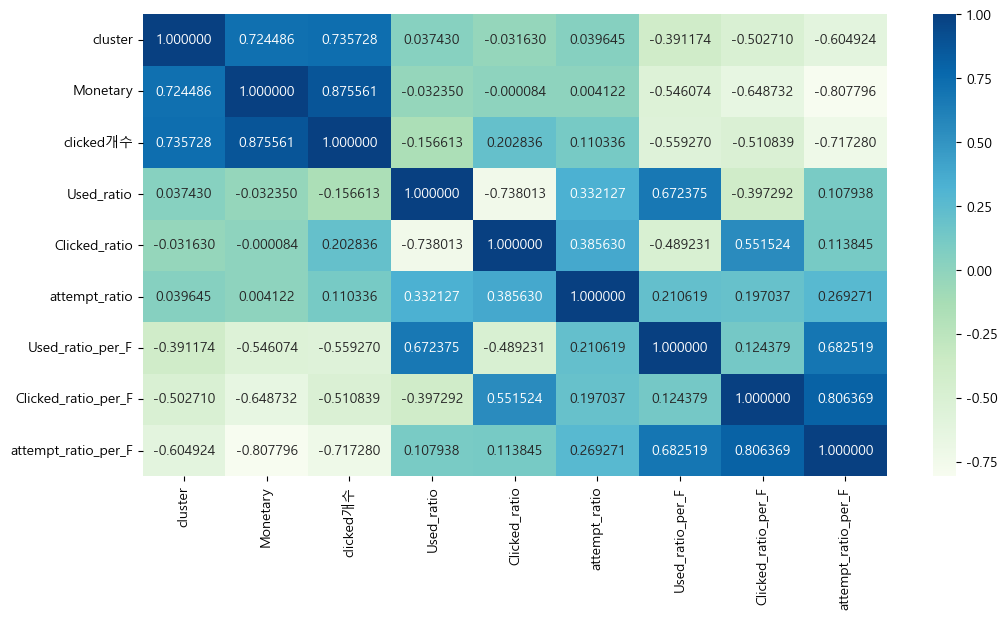

In [305]:
corr=rfm_core.corr(method='pearson')
coupon_corr=corr[['cluster','Monetary','clicked개수','Used_ratio','Clicked_ratio','attempt_ratio','Used_ratio_per_F','Clicked_ratio_per_F','attempt_ratio_per_F']].loc[('cluster','Monetary','clicked개수','Used_ratio','Clicked_ratio','attempt_ratio','Used_ratio_per_F','Clicked_ratio_per_F','attempt_ratio_per_F'),:]
fig,ax=plt.subplots(figsize=(12,6))
sns.heatmap(coupon_corr,annot=True,ax=ax,linecolor='white',cmap='GnBu',fmt='f') #YlOrRd

In [306]:
coupon_corr

cluster  Monetary  clicked개수  Used_ratio  Clicked_ratio  \
cluster              1.000000  0.724486   0.735728    0.037430      -0.031630   
Monetary             0.724486  1.000000   0.875561   -0.032350      -0.000084   
clicked개수            0.735728  0.875561   1.000000   -0.156613       0.202836   
Used_ratio           0.037430 -0.032350  -0.156613    1.000000      -0.738013   
Clicked_ratio       -0.031630 -0.000084   0.202836   -0.738013       1.000000   
attempt_ratio        0.039645  0.004122   0.110336    0.332127       0.385630   
Used_ratio_per_F    -0.391174 -0.546074  -0.559270    0.672375      -0.489231   
Clicked_ratio_per_F -0.502710 -0.648732  -0.510839   -0.397292       0.551524   
attempt_ratio_per_F -0.604924 -0.807796  -0.717280    0.107938       0.113845   

                     attempt_ratio  Used_ratio_per_F  Clicked_ratio_per_F  \
cluster                   0.039645         -0.391174            -0.502710   
Monetary                  0.004122         -0.546074            -0.648732   
clicked개수                 0.110336         -0.559270            -0.510839   
Used_ratio                0.332127          0.672375            -0.397292   
Clicked_ratio             0.385630         -0.489231             0.551524   
attempt_ratio             1.000000          0.210619             0.197037   
Used_ratio_per_F          0.210619          1.000000             0.124379   
Clicked_ratio_per_F       0.197037          0.124379             1.000000   
attempt_ratio_per_F       0.269271          0.682519             0.806369   

                     attempt_ratio_per_F  
cluster                        -0.604924  
Monetary                       -0.807796  
clicked개수                      -0.717280  
Used_ratio                      0.107938  
Clicked_ratio                   0.113845  
attempt_ratio                   0.269271  
Used_ratio_per_F                0.682519  
Clicked_ratio_per_F             0.806369  
attempt_ratio_per_F             1.000000

In [ ]:
rfm_core[f'k_{k}_labels'].unique()

array([0, 3, 2, 1])

In [ ]:
# kmeans_coupon=rfm_core[['cluster','clicked개수','Used_ratio', 'Used_ratio_per_F', 'Clicked_ratio', 'Clicked_ratio_per_F', 'attempt_ratio', 'attempt_ratio_per_F']]
# kmeans_coupon.corr(method='pearson')

In [ ]:
# rfm_core[['Recency','Frequency','Monetary','Length','총납세액','총할인금액','총구매수량','총배송료','cluster']].corr(method='pearson')

<Axes: xlabel='cluster', ylabel='attempt_ratio_per_F'>

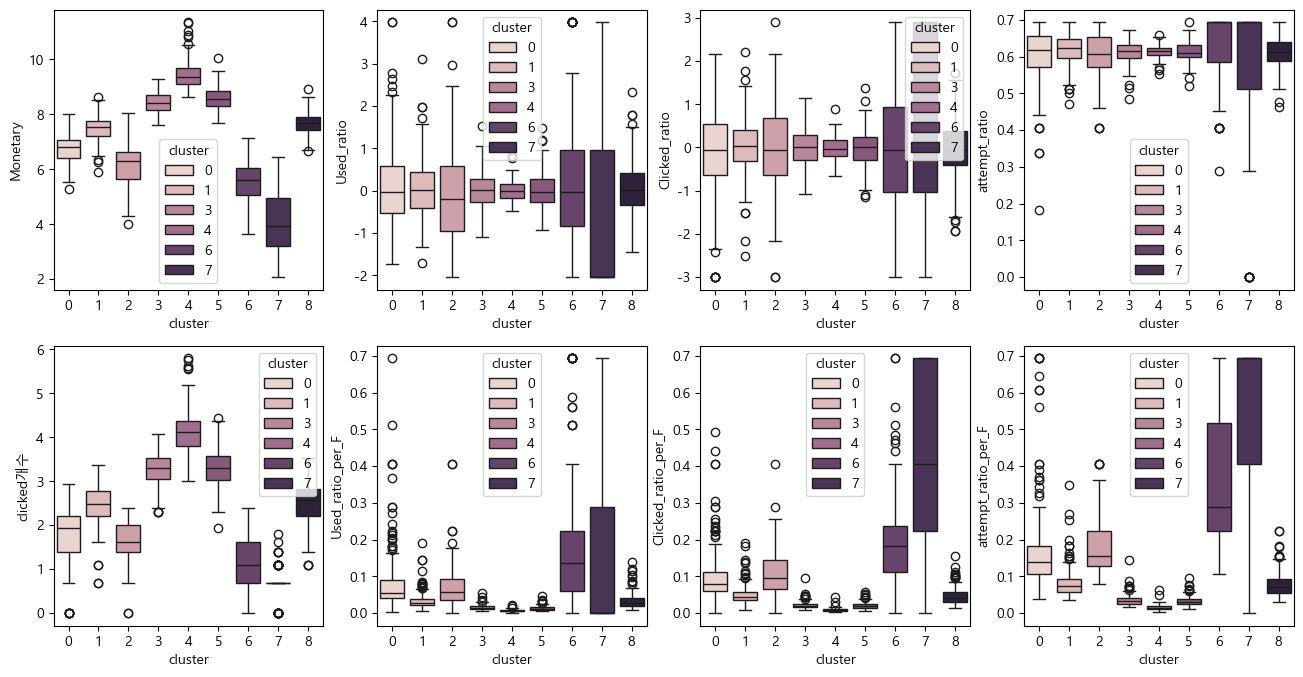

In [308]:
# boxplot
fig, axes = plt.subplots(nrows=2,ncols=4, figsize=(16, 8))
sns.boxplot(data=rfm_core,x='cluster',y='Monetary',hue='cluster',ax=axes[0,0])
sns.boxplot(data=rfm_core,x='cluster',y='Used_ratio',hue='cluster',ax=axes[0,1])
sns.boxplot(data=rfm_core,x='cluster',y='Clicked_ratio',hue='cluster',ax=axes[0,2])
sns.boxplot(data=rfm_core,x='cluster',y='attempt_ratio',hue='cluster',ax=axes[0,3])
sns.boxplot(data=rfm_core,x='cluster',y='clicked개수',hue='cluster',ax=axes[1,0])
sns.boxplot(data=rfm_core,x='cluster',y='Used_ratio_per_F',hue='cluster',ax=axes[1,1])
sns.boxplot(data=rfm_core,x='cluster',y='Clicked_ratio_per_F',hue='cluster',ax=axes[1,2])
sns.boxplot(data=rfm_core,x='cluster',y='attempt_ratio_per_F',hue='cluster',ax=axes[1,3])
# 'Clicked_ratio','attempt_ratio','Used_ratio_per_F','Clicked_ratio_per_F','attempt_ratio_per_F'

In [ ]:
# boxplot
fig, axes = plt.subplots(nrows=2,ncols=4, figsize=(16, 8))
sns.boxplot(data=rfm_core,x='cluster',y='Monetary',hue='cluster',ax=axes[0,0])
sns.boxplot(data=rfm_core,x='cluster',y='Used_ratio',hue='cluster',ax=axes[0,1])
sns.boxplot(data=rfm_core,x='cluster',y='Clicked_ratio',hue='cluster',ax=axes[0,2])
sns.boxplot(data=rfm_core,x='cluster',y='attempt_ratio',hue='cluster',ax=axes[0,3])
sns.boxplot(data=rfm_core,x='cluster',y='clicked개수',hue='cluster',ax=axes[1,0])
sns.boxplot(data=rfm_core,x='cluster',y='Used_ratio_per_F',hue='cluster',ax=axes[1,1])
sns.boxplot(data=rfm_core,x='cluster',y='Clicked_ratio_per_F',hue='cluster',ax=axes[1,2])
sns.boxplot(data=rfm_core,x='cluster',y='attempt_ratio_per_F',hue='cluster',ax=axes[1,3])
# 'Clicked_ratio','attempt_ratio','Used_ratio_per_F','Clicked_ratio_per_F','attempt_ratio_per_F'

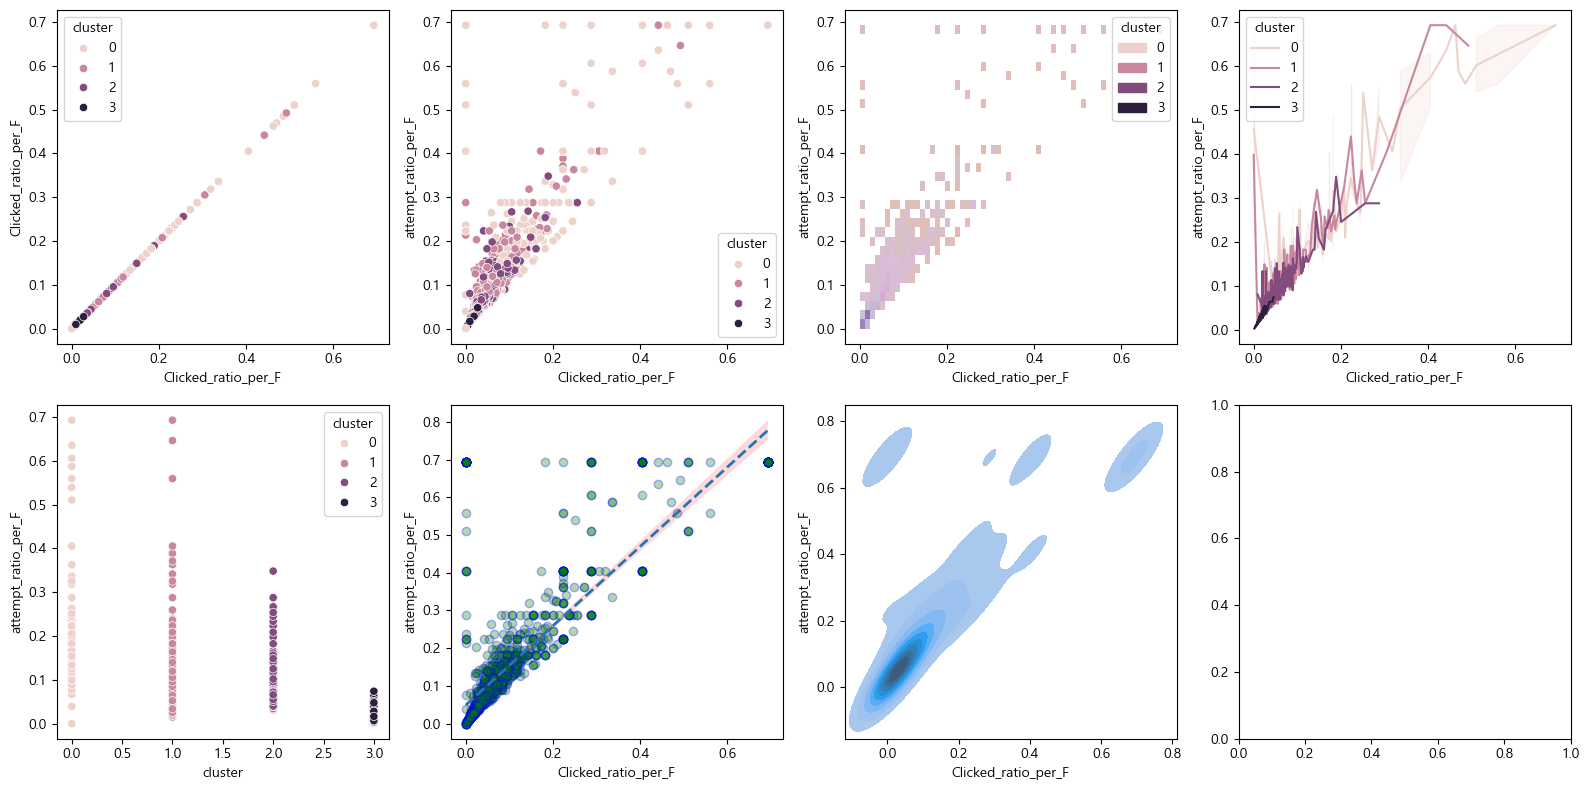

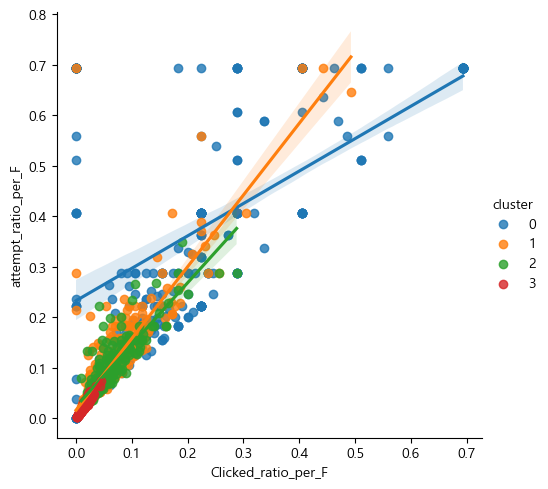

In [314]:
## matplotlib을 활용하여 산점도 그리기
fig, axes = plt.subplots(nrows=2,ncols=4, figsize=(16, 8))

sns.scatterplot(data = rfm_core, x='Clicked_ratio_per_F', y='Clicked_ratio_per_F', hue='cluster',ax=axes[0,0])
axes[0,0].set_ylabel("Clicked_ratio_per_F")
axes[0,0].set_xlabel("Clicked_ratio_per_F")

sns.scatterplot(x ="Clicked_ratio_per_F", y="attempt_ratio_per_F", hue="cluster",data=rfm_core, ax=axes[0,1])
axes[0,1].set_xlabel("Clicked_ratio_per_F")
axes[0,1].set_ylabel("attempt_ratio_per_F")

sns.histplot(data=rfm_core,x='Clicked_ratio_per_F',y='attempt_ratio_per_F',hue='cluster',ax=axes[0,2])
sns.lineplot(data=rfm_core,x='Clicked_ratio_per_F',y='attempt_ratio_per_F',hue='cluster',ax=axes[0,3])
sns.scatterplot(data = rfm_core, x='cluster', y='attempt_ratio_per_F', hue='cluster',ax=axes[1,0])
# reglot은 axes-level function 
sns.regplot(data=rfm_core,x='Clicked_ratio_per_F',y='attempt_ratio_per_F',ax=axes[1,1],
            scatter_kws={"fc":"g","ec":"b","alpha":0.3},line_kws={"lw":2,"ls":"--"})
ci=axes[1,1].get_children()[2]
ci.set(facecolor="red") # face & edge color, alpha 조정


# 2차원 밀도분포 그래프 kdeplot
sns.kdeplot(data=rfm_core,x='Clicked_ratio_per_F',y='attempt_ratio_per_F',fill=True,ax=axes[1,2])
# boxplot
# sns.boxplot(data=rfm_core,x='cluster',y='attempt_ratio_per_F',hue='cluster',ax=axes[1,3])
# lmplot은 figure-level function
sns.lmplot(data=rfm_core,x='Clicked_ratio_per_F',y='attempt_ratio_per_F',hue='cluster',height=5,aspect=1,scatter={"s":50,"alpha":0.5})
fig.tight_layout()

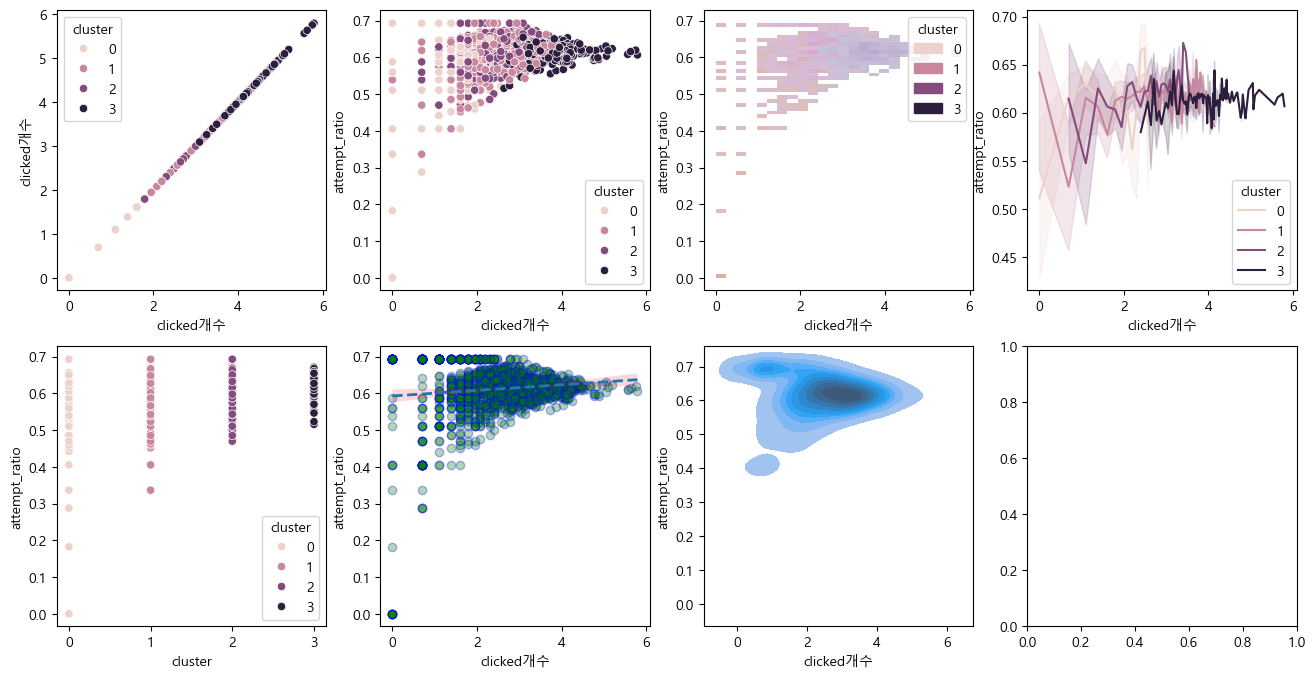

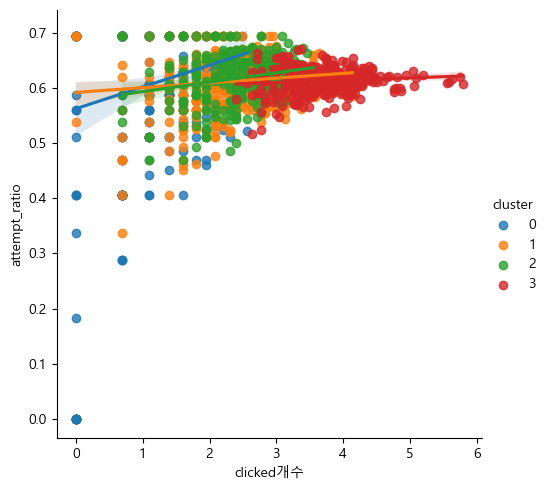

In [ ]:
## matplotlib을 활용하여 산점도 그리기
fig, axes = plt.subplots(nrows=2,ncols=4, figsize=(16, 8))

sns.scatterplot(data = rfm_core, x='clicked개수', y='clicked개수', hue='cluster',ax=axes[0,0])
axes[0,0].set_ylabel("clicked개수")
axes[0,0].set_xlabel("clicked개수")

sns.scatterplot(x ="clicked개수", y="attempt_ratio", hue="cluster",data=rfm_core, ax=axes[0,1])
axes[0,1].set_xlabel("clicked개수")
axes[0,1].set_ylabel("attempt_ratio")

sns.histplot(data=rfm_core,x='clicked개수',y='attempt_ratio',hue='cluster',ax=axes[0,2])
sns.lineplot(data=rfm_core,x='clicked개수',y='attempt_ratio',hue='cluster',ax=axes[0,3])
sns.scatterplot(data = rfm_core, x='cluster', y='attempt_ratio', hue='cluster',ax=axes[1,0])

# reglot은 axes-level function 
sns.regplot(data=rfm_core,x='clicked개수',y='attempt_ratio',ax=axes[1,1],
            scatter_kws={"fc":"g","ec":"b","alpha":0.3},line_kws={"lw":2,"ls":"--"})
ci=axes[1,1].get_children()[2]
ci.set(facecolor="red") # face & edge color, alpha 조정

# 2차원 밀도분포 그래프 kdeplot
sns.kdeplot(data=rfm_core,x='clicked개수',y='attempt_ratio',fill=True,ax=axes[1,2])
# boxplot
# sns.boxplot(data=rfm_core,x='cluster',y='attempt_ratio',hue='cluster',ax=axes[1,3])
# lmplot은 figure-level function
sns.lmplot(data=rfm_core,x='clicked개수',y='attempt_ratio',hue='cluster',height=5,aspect=1,scatter={"s":50,"alpha":0.5})

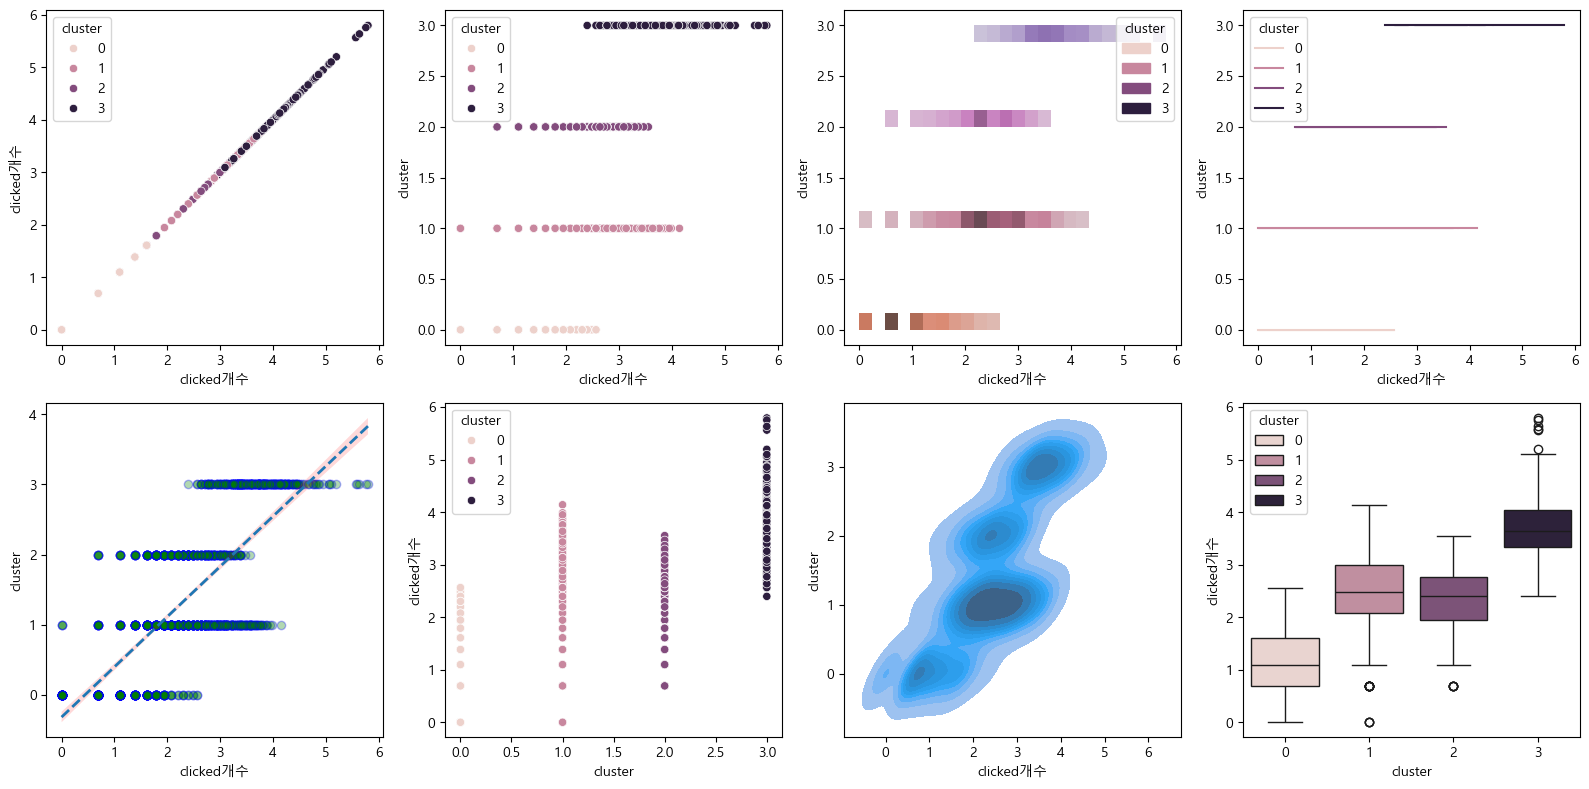

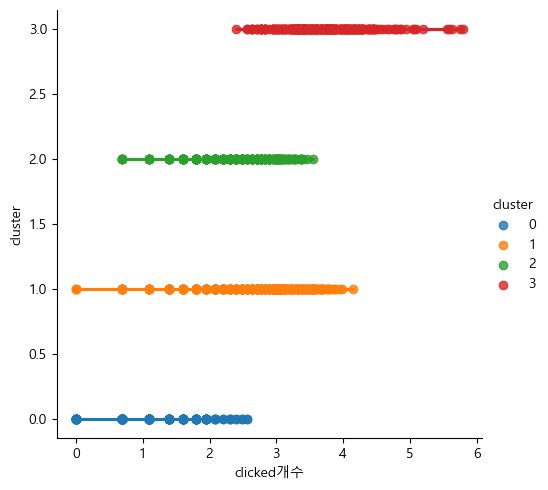

In [ ]:
## matplotlib을 활용하여 산점도 그리기
fig, axes = plt.subplots(nrows=2,ncols=4, figsize=(16, 8))

sns.scatterplot(data = rfm_core, x='clicked개수', y='clicked개수', hue='cluster',ax=axes[0,0])
axes[0,0].set_ylabel("clicked개수")
axes[0,0].set_xlabel("clicked개수")

sns.scatterplot(x ="clicked개수", y="cluster", hue="cluster",data=rfm_core, ax=axes[0,1])
axes[0,1].set_xlabel("clicked개수")
axes[0,1].set_ylabel("cluster")

sns.histplot(data=rfm_core,x='clicked개수',y='cluster',hue='cluster',ax=axes[0,2])
sns.lineplot(data=rfm_core,x='clicked개수',y='cluster',hue='cluster',ax=axes[0,3])
# reglot은 axes-level function 
sns.regplot(data=rfm_core,x='clicked개수',y='cluster',ax=axes[1,0],
            scatter_kws={"fc":"g","ec":"b","alpha":0.3},line_kws={"lw":2,"ls":"--"})
ci=axes[1,0].get_children()[2]
ci.set(facecolor="red") # face & edge color, alpha 조정

sns.scatterplot(data = rfm_core, x='cluster', y='clicked개수', hue='cluster',ax=axes[1,1])
# 2차원 밀도분포 그래프 kdeplot
sns.kdeplot(data=rfm_core,x='clicked개수',y='cluster',fill=True,ax=axes[1,2])
# boxplot
sns.boxplot(data=rfm_core,x='cluster',y='clicked개수',hue='cluster',ax=axes[1,3])
# lmplot은 figure-level function
sns.lmplot(data=rfm_core,x='clicked개수',y='cluster',hue='cluster',height=5,aspect=1,scatter={"s":50,"alpha":0.5})
fig.tight_layout()

<Axes: xlabel='cluster', ylabel='attempt_ratio_per_F'>

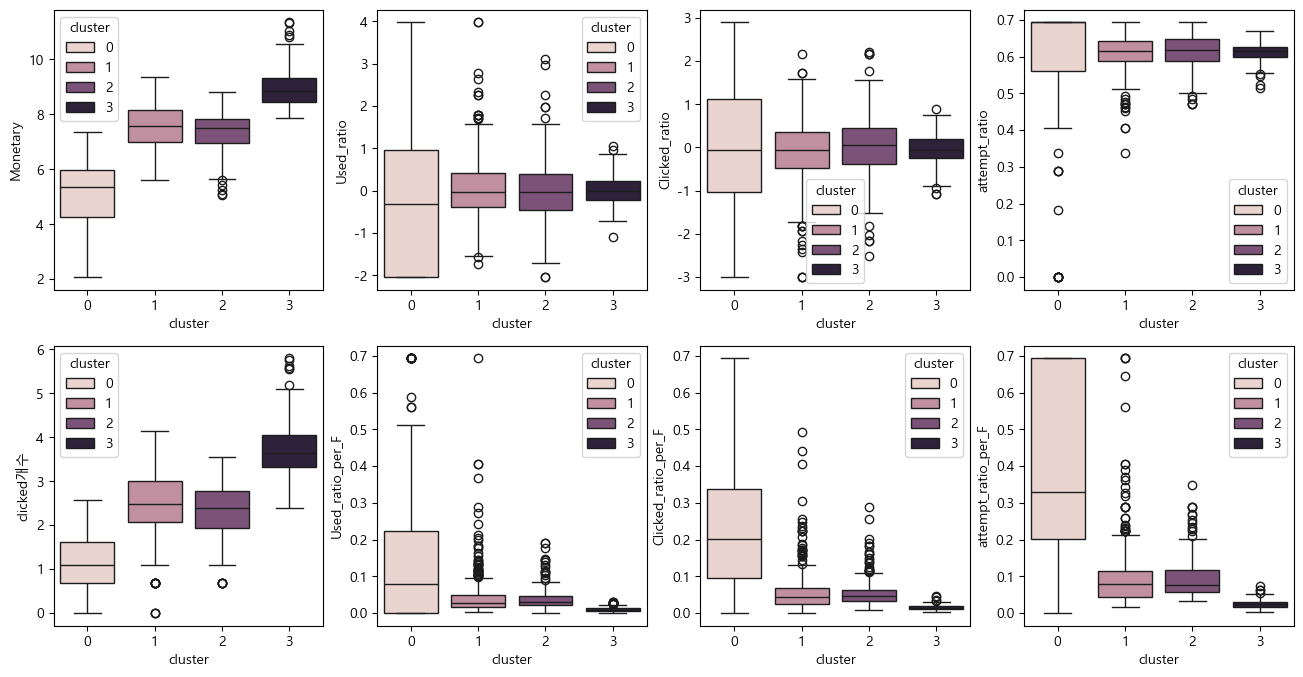

In [ ]:
# boxplot
fig, axes = plt.subplots(nrows=2,ncols=4, figsize=(16, 8))
sns.boxplot(data=rfm_core,x='cluster',y='Monetary',hue='cluster',ax=axes[0,0])
sns.boxplot(data=rfm_core,x='cluster',y='Used_ratio',hue='cluster',ax=axes[0,1])
sns.boxplot(data=rfm_core,x='cluster',y='Clicked_ratio',hue='cluster',ax=axes[0,2])
sns.boxplot(data=rfm_core,x='cluster',y='attempt_ratio',hue='cluster',ax=axes[0,3])
sns.boxplot(data=rfm_core,x='cluster',y='clicked개수',hue='cluster',ax=axes[1,0])
sns.boxplot(data=rfm_core,x='cluster',y='Used_ratio_per_F',hue='cluster',ax=axes[1,1])
sns.boxplot(data=rfm_core,x='cluster',y='Clicked_ratio_per_F',hue='cluster',ax=axes[1,2])
sns.boxplot(data=rfm_core,x='cluster',y='attempt_ratio_per_F',hue='cluster',ax=axes[1,3])
# 'Clicked_ratio','attempt_ratio','Used_ratio_per_F','Clicked_ratio_per_F','attempt_ratio_per_F'

In [ ]:
# cluster_u = kmeans_coupon["cluster"].unique()
# for i, s in enumerate(cluster_u):
#     # matplotlib 산점도
#     axes[2].scatter(kmeans_coupon["clicked개수"].loc[kmeans_coupon["cluster"]==s],
#                    kmeans_coupon["clicked개수"].loc[kmeans_coupon["cluster"]==s],
#                    c=f"C{i}", label=s, alpha=0.3
#                   )
#     # seaborn 추세선
#     sns.regplot(x="clicked개수", y="clicked개수", data=kmeans_coupon.loc[kmeans_coupon["cluster"]==s], 
#                 scatter=False, ax=axes[2])
    
# axes[2].legend(cluster_u, title="cluster")
# axes[2].set_xlabel("clicked개수")
# axes[2].set_ylabel("clicked개수")

In [ ]:
# a = rfm_core[rfm_core['k_3_labels'] == 0]['clicked개수']
# b = rfm_core[rfm_core['k_3_labels'] == 1]['clicked개수']
# c = rfm_core[rfm_core['k_3_labels'] == 2]['clicked개수']
# a

In [ ]:
# for k in range(3, 9):
#     kmeans = KMeans(n_clusters=k, random_state=9, init='k-means++').fit(rfm_pca2)
#     silhouette_avg = silhouette_score(rfm_pca2, kmeans.labels_)
#     print("k = {} -> silhouette index {}".format(k, silhouette_avg))

In [ ]:
# kelbow_visualizer(KMeans(random_state=9), rfm_pca2, k=(3,20))

In [ ]:
# kelbow_visualizer(KMeans(random_state=9), rfm_pca2, k=(3,20), metric='silhouette')

In [ ]:
# kelbow_visualizer(KMeans(random_state=9), rfm_pca2, k=(3,20), metric="calinski_harabasz")

In [ ]:
# for k in range(3, 9):
#     kmeans = KMeans(n_clusters=k, random_state=9, init='random').fit(rfm_pca2)
#     silhouette_avg = silhouette_score(rfm_pca2, kmeans.labels_)
#     print("k = {} -> silhouette index {}".format(k, silhouette_avg))

In [ ]:
# kelbow_visualizer(KMeans(random_state=42, init='random'), rfm_core, k=(3,20))

In [ ]:
# kelbow_visualizer(KMeans(random_state=9, init='random'), rfm_pca2, k=(3,20), metric="silhouette")

In [ ]:
# kelbow_visualizer(KMeans(random_state=9, init='random'), rfm_pca2, k=(3,20), metric="calinski_harabasz")

In [ ]:
# from sklearn.cluster import DBSCAN

In [ ]:
# dbscan = DBSCAN(eps=0.1, min_samples=2).fit(rfm_core.iloc[:, :3])


# rfm_core['dbscan_labels'] = dbscan.labels_
# # 

# sns.scatterplot(data = rfm_core, x='Recency', y='Monetary', hue='dbscan_labels')
# plt.title('DBSCAN', fontsize=20)
# plt.xlabel('Recency', fontsize=16)
# plt.ylabel('Monetary', fontsize=16)

In [ ]:
# for k in range(3, 9):
#     h_cluster = rfm_clustering = AgglomerativeClustering(n_clusters = k, metric = 'euclidean', linkage = 'ward').fit_predict(rfm_core)
#     silhouette_avg = silhouette_score(rfm_core, h_cluster)
#     print("k = {} -> silhouette index {}".format(k, silhouette_avg))

In [ ]:
# kelbow_visualizer(AgglomerativeClustering(metric = 'euclidean', linkage = 'ward'), rfm_core, k=(3,20), metric='silhouette')

In [ ]:
# h_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage = 'ward').fit(rfm_core.iloc[:, :3])

# rfm_core['h_cluster_label'] = h_cluster.labels_

# sns.scatterplot(data = rfm_core, x='Recency', y='Monetary', hue='h_cluster_label')
# plt.title('계층적 군집화', fontsize=20)
# plt.xlabel('Recency', fontsize=16)
# plt.ylabel('Monetary', fontsize=16)

In [ ]:

# rfm_pca2['kmeans_labels'] = rfm_core['kmeans_labels']
# rfm_pca2['dbscan_labels'] = rfm_core['dbscan_labels']
# rfm_pca2['h_cluster_label'] = rfm_core['h_cluster_label']

In [ ]:
# sns.scatterplot(data = rfm_pca2, x='pca1', y='pca2', hue='kmeans_labels')
# plt.title('kmeans 군집화', fontsize=20)
# plt.xlabel('pca1', fontsize=16)
# # plt.ylabel('pca2', fontsize=16)

In [ ]:
# sns.scatterplot(data = rfm_pca2, x='pca1', y='pca2', hue='dbscan_labels')
# plt.title('dbscan 군집화', fontsize=20)
# plt.xlabel('pca1', fontsize=16)
# plt.ylabel('pca2', fontsize=16)

In [ ]:
# sns.scatterplot(data = rfm_pca2, x='pca1', y='pca2', hue='h_cluster_label')
# plt.title('계층적 군집화', fontsize=20)
# plt.xlabel('pca1', fontsize=16)
# plt.ylabel('pca2', fontsize=16)

In [ ]:
# tsne = TSNE(n_components=2)

# rfm_tsne = pd.DataFrame(data=tsne.fit_transform(rfm_core.iloc[:, :3]), columns=['col1', 'col2'])

# rfm_tsne['kmeans_labels'] = rfm_core['kmeans_labels']
# rfm_tsne['dbscan_labels'] = rfm_core['dbscan_labels']
# rfm_tsne['h_cluster_label'] = rfm_core['h_cluster_label']

In [ ]:
# sns.scatterplot(data = rfm_tsne, x='col1', y='col2', hue='kmeans_labels')
# plt.title('kmeans 군집화', fontsize=20)
# plt.xlabel('col1', fontsize=16)
# plt.ylabel('col2', fontsize=16)

In [ ]:
# sns.scatterplot(data = rfm_tsne, x='col1', y='col2', hue='dbscan_labels')
# plt.title('dbscan 군집화', fontsize=20)
# plt.xlabel('col1', fontsize=16)
# plt.ylabel('col2', fontsize=16)

In [ ]:
# sns.scatterplot(data = rfm_tsne, x='col1', y='col2', hue='h_cluster_label')
# plt.title('계층적 군집화', fontsize=20)
# plt.xlabel('col1', fontsize=16)
# plt.ylabel('col2', fontsize=16)

1. EDA(원본 데이터)
2. 유저데이터 변환 - RFM 분석의 지표를 차용함
4. 클러스터 수 선정 kmeans(init=random)metric=3가지로 했을 때 k=4가 나와서
3. 클러스터링 기법 선정
    - kmeans
    - dbscan: 데이터가 기하학적인 분포가 존재한다고 할 수 없고
      데이터가 밀도가 과도하게 높은 지점이 존재하기 때문에 지나친 양분화로 인해 탈락

    - 계층적 군집화 : 지표로 사용한 RFM 분석에서 cut을 사용하는 것과 유사하게
      트리구조의 개념으로 분류하는 것이라서 적합해보임


### EDA

In [ ]:
##### 비즈니스 인사이트 테이블

In [ ]:
#### ROAS 지표

df.head()

고객ID              거래ID       거래날짜          제품ID    제품카테고리  수량    평균금액  \
0  USER_1358  Transaction_0000 2019-01-01  Product_0981  Nest-USA   1  153.71   
1  USER_1358  Transaction_0001 2019-01-01  Product_0981  Nest-USA   1  153.71   
2  USER_1358  Transaction_0002 2019-01-01  Product_0904    Office   1    2.05   
3  USER_1358  Transaction_0003 2019-01-01  Product_0203   Apparel   5   17.53   
4  USER_1358  Transaction_0003 2019-01-01  Product_0848      Bags   1   16.50   

   배송료      쿠폰상태 성별     고객지역  가입기간   GST    월    쿠폰코드   할인율  오프라인비용   온라인비용  \
0  6.5      Used  남  Chicago    12  0.10  Jan  ELEC10  10.0    4500  2424.5   
1  6.5      Used  남  Chicago    12  0.10  Jan  ELEC10  10.0    4500  2424.5   
2  6.5      Used  남  Chicago    12  0.10  Jan   OFF10  10.0    4500  2424.5   
3  6.5  Not Used  남  Chicago    12  0.18  Jan  SALE10  10.0    4500  2424.5   
4  6.5      Used  남  Chicago    12  0.18  Jan   AIO10  10.0    4500  2424.5   

   true_discount     평균배송료     납세액         총금액  real_discount  df총할인금액  
0              1  6.500000  15.371  160.210000           10.0   15.371  
1              1  6.500000  15.371  160.210000           10.0   15.371  
2              1  6.500000   0.205    8.550000           10.0    0.205  
3              0  1.083333  15.777  104.510333            0.0    0.000  
4              1  1.083333   2.970   18.903333           10.0    1.650

In [ ]:
df['총마케팅비용'] = df['오프라인비용'] + df['온라인비용']
df['ma_total_marketing'] = df['총마케팅비용'].rolling(7).mean().fillna(method='bfill')
df

고객ID               거래ID       거래날짜          제품ID    제품카테고리  수량  \
0      USER_1358   Transaction_0000 2019-01-01  Product_0981  Nest-USA   1   
1      USER_1358   Transaction_0001 2019-01-01  Product_0981  Nest-USA   1   
2      USER_1358   Transaction_0002 2019-01-01  Product_0904    Office   1   
3      USER_1358   Transaction_0003 2019-01-01  Product_0203   Apparel   5   
4      USER_1358   Transaction_0003 2019-01-01  Product_0848      Bags   1   
...          ...                ...        ...           ...       ...  ..   
52919  USER_0504  Transaction_25056 2019-12-31  Product_0976  Nest-USA   1   
52920  USER_0504  Transaction_25057 2019-12-31  Product_0413   Apparel   1   
52921  USER_0504  Transaction_25058 2019-12-31  Product_0989  Nest-USA   1   
52922  USER_0562  Transaction_25059 2019-12-31  Product_0985  Nest-USA   5   
52923  USER_0562  Transaction_25060 2019-12-31  Product_0984  Nest-USA   4   

         평균금액    배송료      쿠폰상태 성별        고객지역  가입기간   GST    월    쿠폰코드   할인율  \
0      153.71   6.50      Used  남     Chicago    12  0.10  Jan  ELEC10  10.0   
1      153.71   6.50      Used  남     Chicago    12  0.10  Jan  ELEC10  10.0   
2        2.05   6.50      Used  남     Chicago    12  0.10  Jan   OFF10  10.0   
3       17.53   6.50  Not Used  남     Chicago    12  0.18  Jan  SALE10  10.0   
4       16.50   6.50      Used  남     Chicago    12  0.18  Jan   AIO10  10.0   
...       ...    ...       ... ..         ...   ...   ...  ...     ...   ...   
52919  121.30   6.50   Clicked  여    New York    45  0.10  Dec  ELEC30  30.0   
52920   48.92   6.50      Used  여    New York    45  0.18  Dec  SALE30  30.0   
52921  151.88   6.50      Used  여    New York    45  0.10  Dec  ELEC30  30.0   
52922   80.52   6.50   Clicked  여  California     7  0.10  Dec  ELEC30  30.0   
52923   80.52  19.99   Clicked  여  California     7  0.10  Dec  ELEC30  30.0   

       오프라인비용    온라인비용  true_discount      평균배송료      납세액         총금액  \
0        4500  2424.50              1   6.500000  15.3710  160.210000   
1        4500  2424.50              1   6.500000  15.3710  160.210000   
2        4500  2424.50              1   6.500000   0.2050    8.550000   
3        4500  2424.50              0   1.083333  15.7770  104.510333   
4        4500  2424.50              1   1.083333   2.9700   18.903333   
...       ...      ...            ...        ...      ...         ...   
52919    4000  2058.75              0   6.500000  12.1300  139.930000   
52920    4000  2058.75              1   6.500000   8.8056   49.549600   
52921    4000  2058.75              1   6.500000  15.1880  128.004000   
52922    4000  2058.75              0   6.500000  40.2600  449.360000   
52923    4000  2058.75              0  19.990000  32.2080  374.278000   

       real_discount  df총할인금액   총마케팅비용  ma_total_marketing  
0               10.0   15.371  6924.50             6924.50  
1               10.0   15.371  6924.50             6924.50  
2               10.0    0.205  6924.50             6924.50  
3                0.0    0.000  6924.50             6924.50  
4               10.0    1.650  6924.50             6924.50  
...              ...      ...      ...                 ...  
52919            0.0    0.000  6058.75             6058.75  
52920           30.0   14.676  6058.75             6058.75  
52921           30.0   45.564  6058.75             6058.75  
52922            0.0    0.000  6058.75             6058.75  
52923            0.0    0.000  6058.75             6058.75  

[52924 rows x 26 columns]

In [ ]:
marketing = df[['거래날짜', '총마케팅비용']].drop_duplicates().reset_index(drop=True)

marketing2 = df[['거래날짜', '총마케팅비용']].drop_duplicates().reset_index(drop=True)
marketing2['ma_total_marketing'] = marketing2['총마케팅비용'].rolling(7).mean().fillna(method='bfill')
marketing2 = marketing2.rename(columns={'ma_total_marketing':'총마케팅비용(7일ma)'})
marketing2

거래날짜   총마케팅비용  총마케팅비용(7일ma)
0   2019-01-01  6924.50   7477.351429
1   2019-01-02  7980.36   7477.351429
2   2019-01-03  6076.38   7477.351429
3   2019-01-04  7428.55   7477.351429
4   2019-01-05  8555.30   7477.351429
..         ...      ...           ...
360 2019-12-27  7396.87   6754.795714
361 2019-12-28  7246.84   6702.525714
362 2019-12-29  6546.58   6664.971429
363 2019-12-30  4674.31   6375.631429
364 2019-12-31  6058.75   6134.101429

[365 rows x 3 columns]

In [ ]:
sales = df.groupby('거래날짜')['총금액'].sum().reset_index()
sales

거래날짜         총금액
0   2019-01-01   8389.5816
1   2019-01-02  14967.0770
2   2019-01-03  27206.2101
3   2019-01-04  18768.6781
4   2019-01-05  20104.2152
..         ...         ...
360 2019-12-27  14209.5811
361 2019-12-28  11014.3226
362 2019-12-29  12276.2817
363 2019-12-30   8397.3965
364 2019-12-31  10716.6735

[365 rows x 2 columns]

In [ ]:
roas1 = pd.merge(marketing, sales, how='left', on='거래날짜')
roas1['ratio'] = roas1['총금액'] / roas1['총마케팅비용']
roas1.sort_values('ratio', ascending=False).head(10)

거래날짜   총마케팅비용         총금액      ratio
150 2019-05-31  1510.30  23770.4291  15.738879
29  2019-01-30  1681.86  21349.3265  12.693879
94  2019-04-05  4842.68  59088.7803  12.201669
151 2019-06-01   820.25   9678.5838  11.799554
31  2019-02-01  1392.67  16000.5043  11.489085
23  2019-01-24  1560.02  16505.0998  10.580057
213 2019-08-02  3655.96  37909.3386  10.369189
30  2019-01-31  2080.14  21020.9349  10.105539
149 2019-05-30  1762.38  17584.7791   9.977859
107 2019-04-18  5476.58  53397.6890   9.750189

In [ ]:
roas2 = pd.merge(marketing2, sales, how='left', on='거래날짜')
roas2['ratio'] = roas2['총금액'] / roas2['총마케팅비용(7일ma)']
roas2.sort_values('ratio', ascending=False).head(10)


거래날짜   총마케팅비용  총마케팅비용(7일ma)         총금액      ratio
94  2019-04-05  4842.68   4289.407143  59088.7803  13.775512
29  2019-01-30  1681.86   1788.870000  21349.3265  11.934532
213 2019-08-02  3655.96   3241.630000  37909.3386  11.694530
30  2019-01-31  2080.14   1863.172857  21020.9349  11.282332
330 2019-11-27  5819.58   5001.338571  55439.0730  11.084847
150 2019-05-31  1510.30   2243.272857  23770.4291  10.596316
198 2019-07-18  4408.61   3999.448571  41761.8631  10.441905
107 2019-04-18  5476.58   5430.738571  53397.6890   9.832491
31  2019-02-01  1392.67   1758.561429  16000.5043   9.098633
32  2019-02-02  1470.87   1691.888571  13779.3542   8.144363

<Axes: xlabel='거래날짜', ylabel='ratio'>

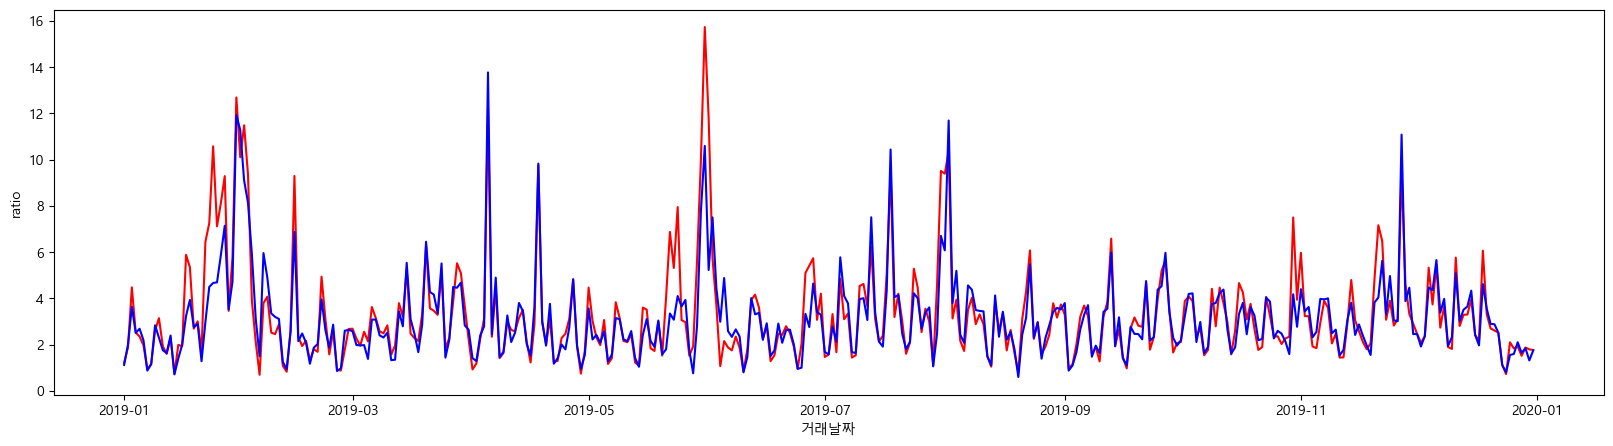

In [ ]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=roas1, x='거래날짜', y='ratio', color='red')
sns.lineplot(data=roas2, x='거래날짜', y='ratio', color='blue')


# ratio(빨강) = 총비용 / 총마케팅비용
# ratio(파랑) = 총비용 / 총마케팅비용(이동평균)

# 총마케팅비용(이동평균) - 원본의 고점을 낮게 만드는 효과

# 마케팅의 특성상 직관적으로 볼때는 이동평균을 하는게 맞아보이는데


In [ ]:
week = []
cut = 0


for i in range(1, 54):
    for j in range(7):
        week.append(i)
        if len(week) == len(roas1):
            break
    if len(week) == len(roas1):
        break

roas1['week'] = np.array(week).reshape(len(roas1), -1)
roas1

거래날짜   총마케팅비용         총금액     ratio  week
0   2019-01-01  6924.50   8389.5816  1.211579     1
1   2019-01-02  7980.36  14967.0770  1.875489     1
2   2019-01-03  6076.38  27206.2101  4.477371     1
3   2019-01-04  7428.55  18768.6781  2.526560     1
4   2019-01-05  8555.30  20104.2152  2.349914     1
..         ...      ...         ...       ...   ...
360 2019-12-27  7396.87  14209.5811  1.921026    52
361 2019-12-28  7246.84  11014.3226  1.519879    52
362 2019-12-29  6546.58  12276.2817  1.875221    52
363 2019-12-30  4674.31   8397.3965  1.796500    52
364 2019-12-31  6058.75  10716.6735  1.768793    53

[365 rows x 5 columns]

In [ ]:
week_core = pd.DataFrame(roas1.groupby('week')[['총마케팅비용', '총금액']].sum()).reset_index()
week_core['ratio_week'] = week_core['총금액'] / week_core['총마케팅비용']
week_core.sort_values('ratio_week', ascending=False).head(10)

week    총마케팅비용          총금액  ratio_week
21    22  10081.86   77987.7588    7.735453
3      4  13710.42  100285.4809    7.314545
4      5  13870.26   98204.4768    7.080219
30    31  21959.29  127391.8228    5.801272
28    29  28218.83  117955.2384    4.180019
46    47  33355.78  137593.1222    4.125016
47    48  37320.98  152192.1311    4.077924
20    21  18022.79   72792.0879    4.038891
13    14  31863.55  126414.3853    3.967367
11    12  26066.40  101540.6453    3.895461

<Axes: xlabel='week', ylabel='총마케팅비용'>

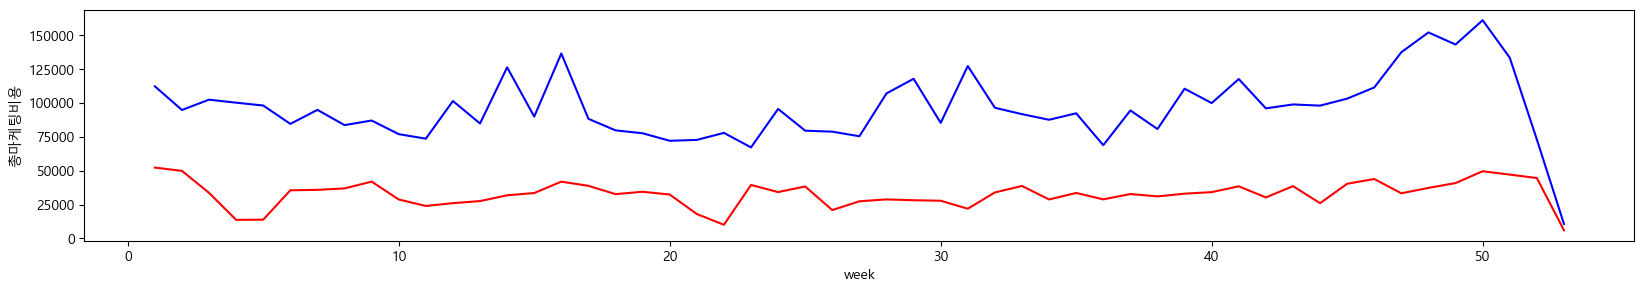

In [ ]:
plt.figure(figsize=(20, 3))
sns.lineplot(data=week_core, x='week', y='총마케팅비용', color='red')
sns.lineplot(data=week_core, x='week', y='총금액', color='blue')


<Axes: xlabel='week', ylabel='ratio_week'>

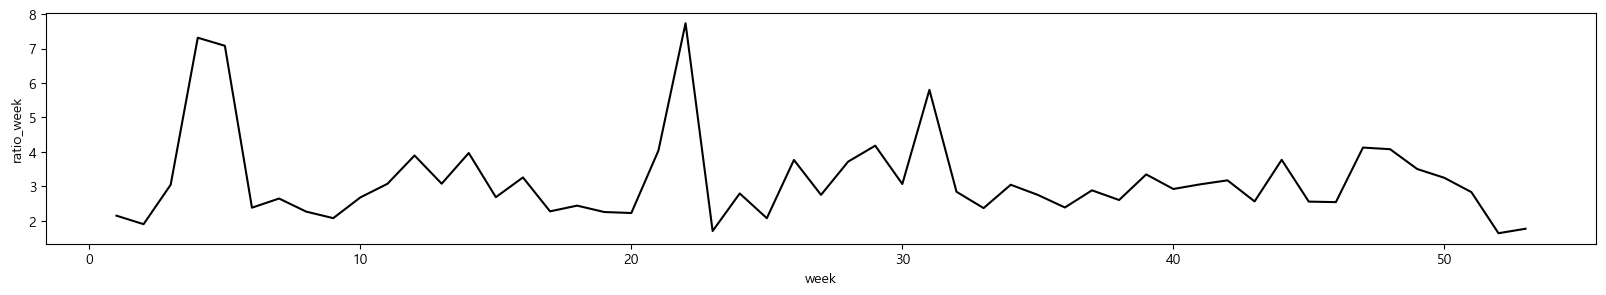

In [ ]:
plt.figure(figsize=(20, 3))
sns.lineplot(data=week_core, x='week', y='ratio_week', color='black')